# Group Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
!{sys.executable} -m pip install numpy imblearn seaborn pandas matplotlib scikit-learn optuna | grep -v 'already satisfied'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/jbn3/.local/lib/python3.9/site-packages
sysconfig: /home/jbn3/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [2]:
#We read in the data from the student server
train_data = pd.read_csv("/cs/studres/ID5059/Coursework/Coursework-2/data/train.csv")
data = train_data.copy(deep=True)
pd.set_option('display.max_columns', None)
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


## 1. Data Exploration

In this section, we will look at some of the distributions of the features. The more serious data exploration is done in R, as the visualisations are more conveninet there. We have the graphs here just for ease of comparison with the new distributions that we will achieve when we explore methods for imbalanced classes.

In [3]:
train_data.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [4]:
train_data.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

It makes sense for the numeric features to have a lot of unique values. However, the categorical features all have 2-4 unique values, meaning it would be okay to hot encode these features.

<Axes: >

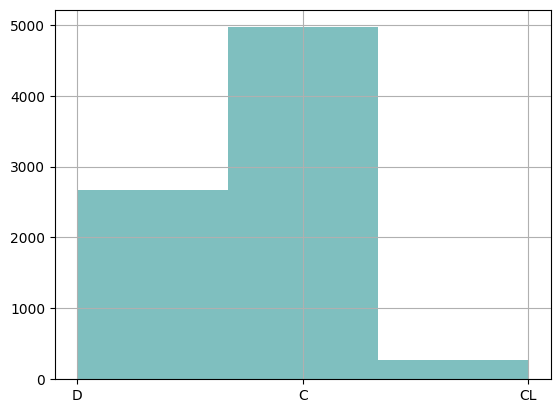

In [5]:
#Look at the distribution of the Status classes
train_data["Status"].hist(bins = 3, color = 'teal', \
           alpha=0.5)

### 1.1 Visualising categorical features

Once again, these visualisations are here for ease of direct comparison of the imbalanced-classes-methods. A detailed analysis is given in the R notebook.

These graphs show us the percentage of each class that belongs to different categories within each categorical feature.

<Axes: xlabel='Drug', ylabel='proportion'>

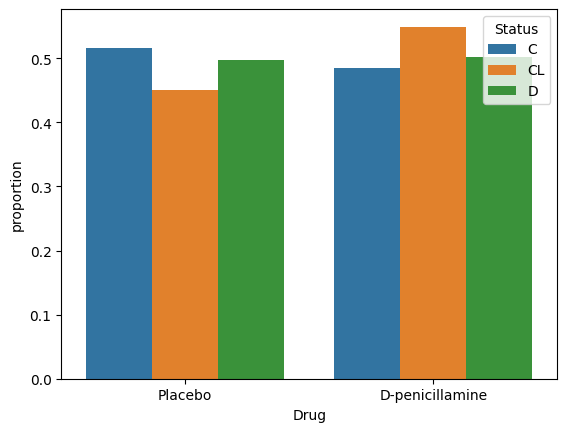

In [6]:
categorical = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]

x, y, hue = "Drug", "proportion", "Status"
(train_data[x]
 .groupby(train_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Sex', ylabel='proportion'>

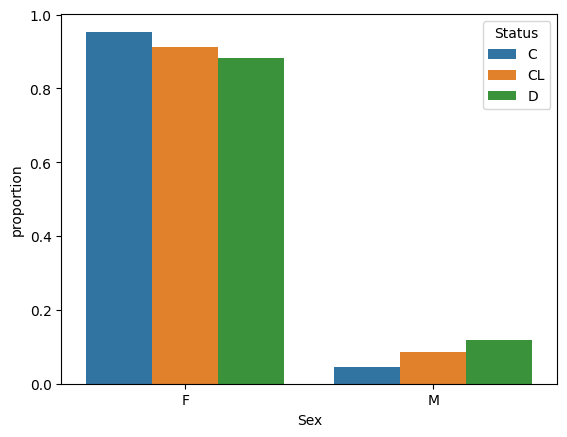

In [7]:
x, y, hue = "Sex", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Ascites', ylabel='proportion'>

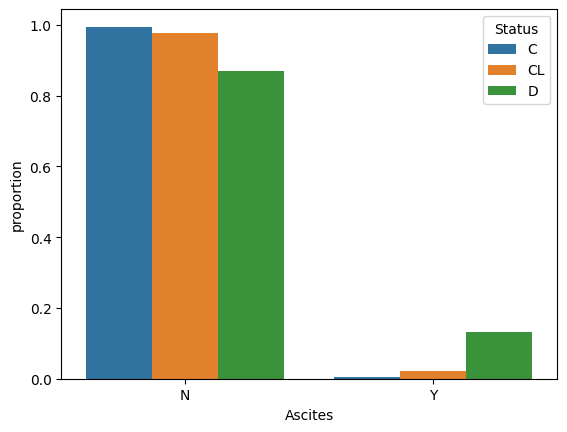

In [8]:
x, y, hue = "Ascites", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Hepatomegaly', ylabel='proportion'>

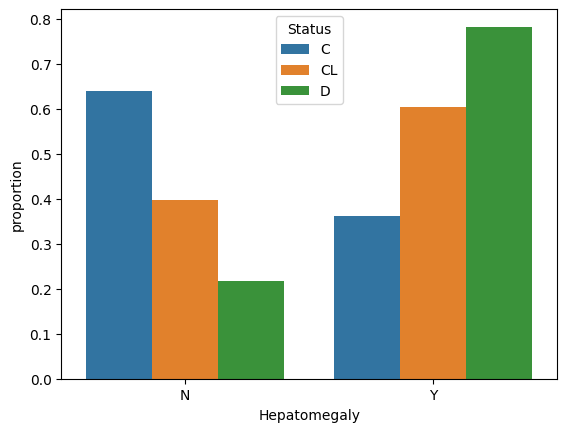

In [9]:
x, y, hue = "Hepatomegaly", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Spiders', ylabel='proportion'>

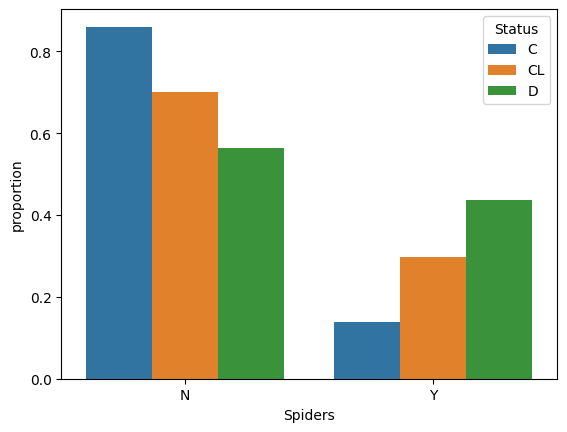

In [10]:
x, y, hue = "Spiders", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Edema', ylabel='proportion'>

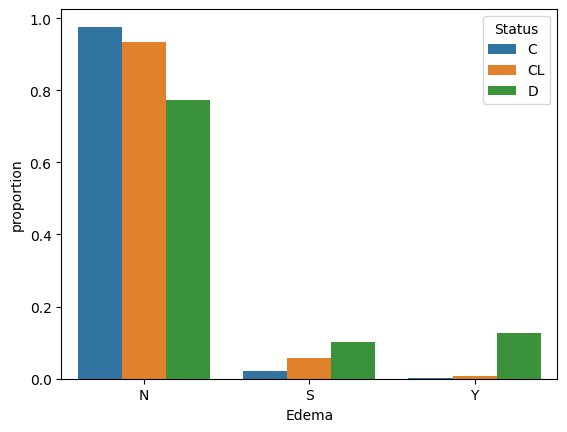

In [11]:
x, y, hue = "Edema", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Stage', ylabel='proportion'>

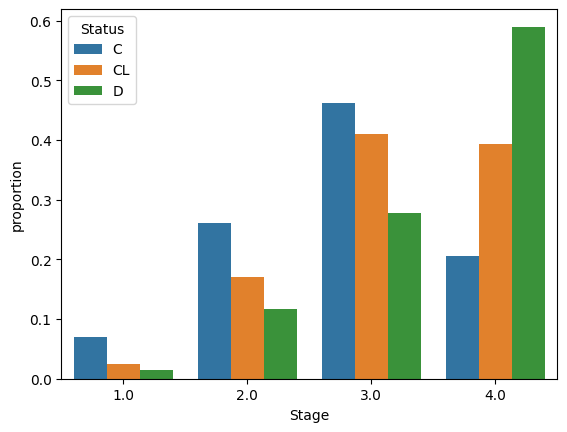

In [12]:
x, y, hue = "Stage", "proportion", "Status"
(train_data[x]
         .groupby(train_data[hue])
         .value_counts(normalize=True)
         .rename(y)
         .reset_index()
         .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

### 1.2 Visualising numeric features

Here we visualise the numeric features.

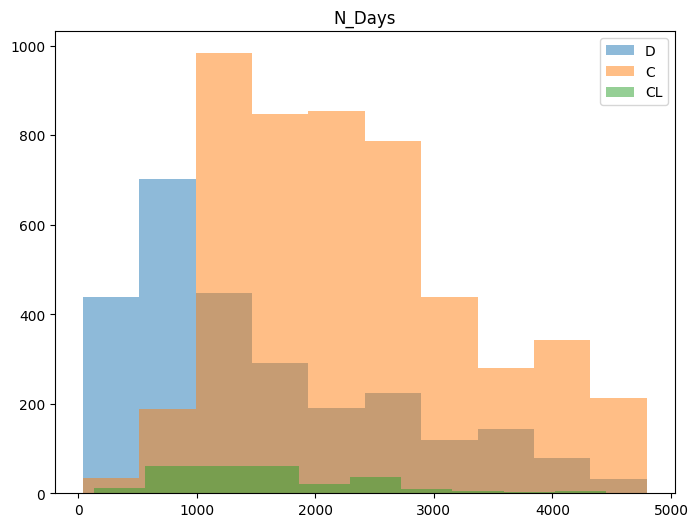

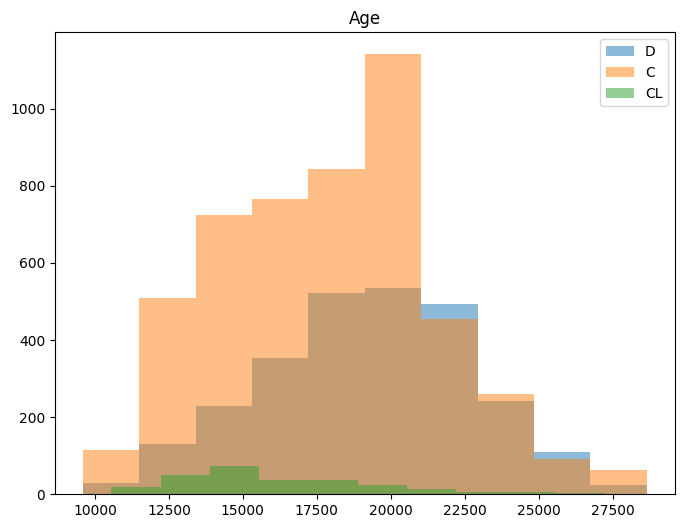

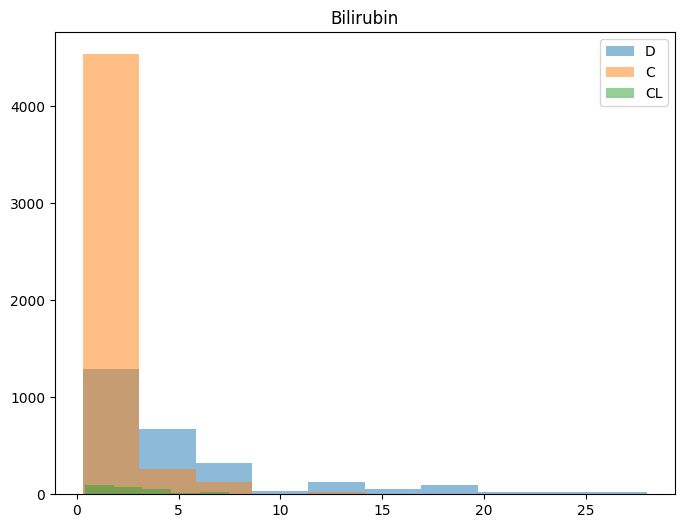

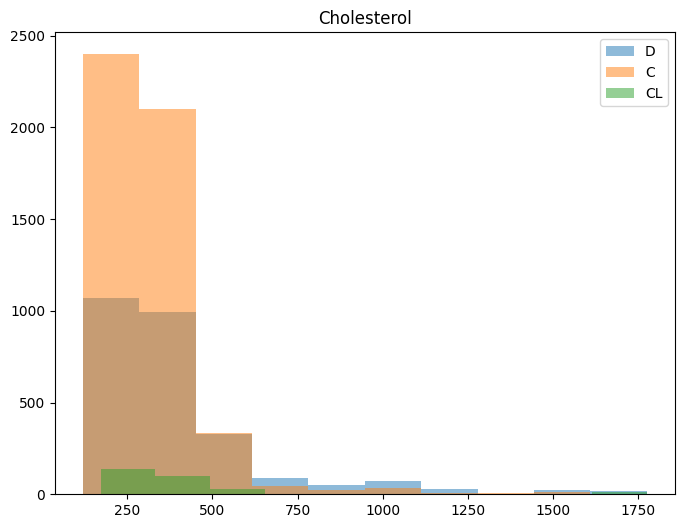

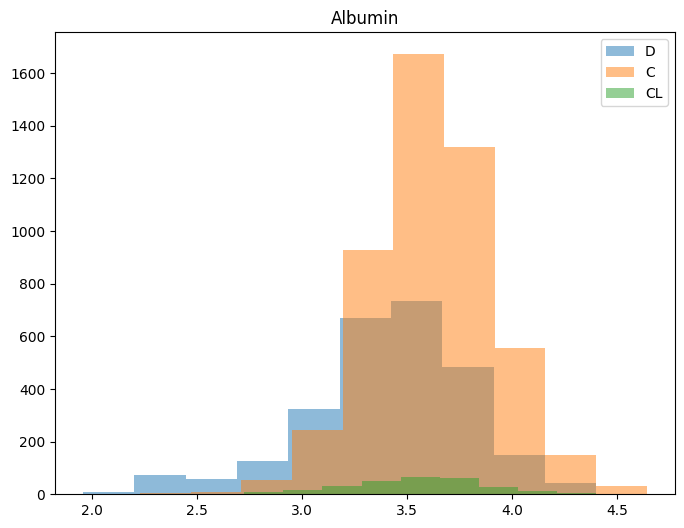

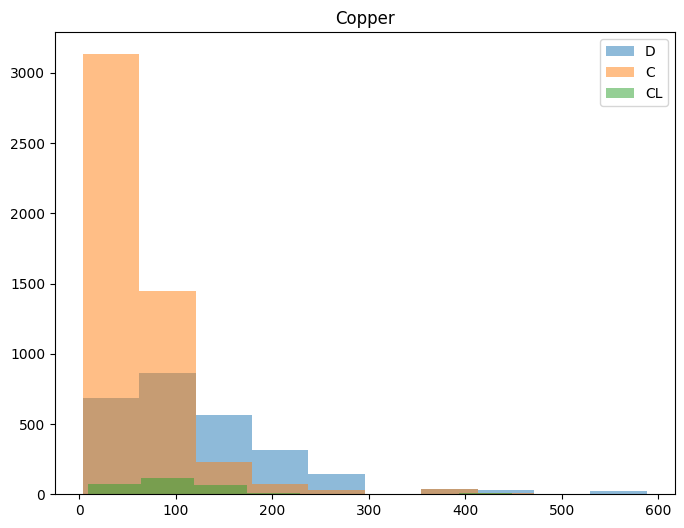

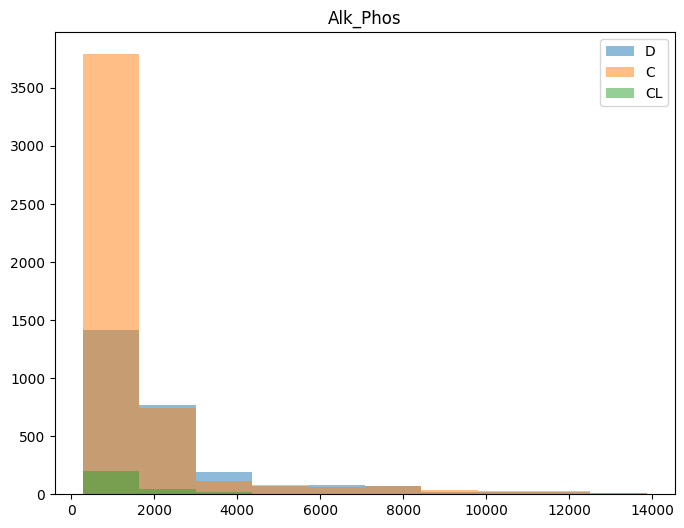

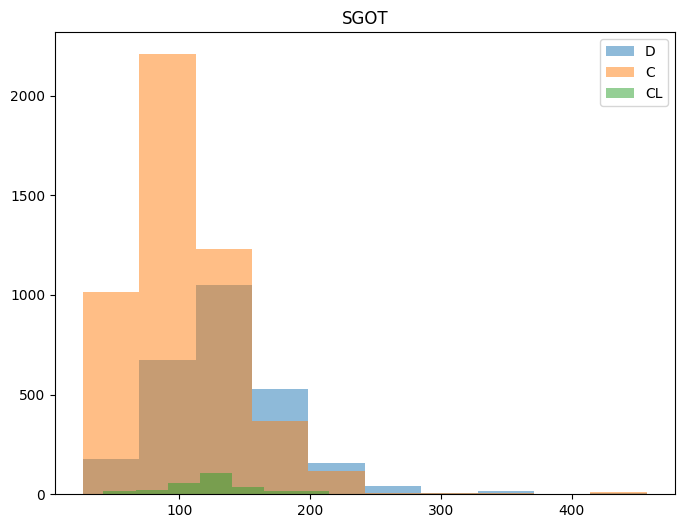

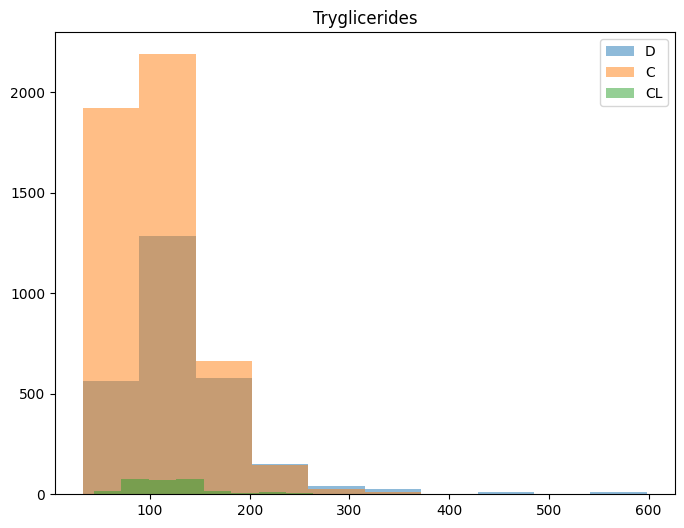

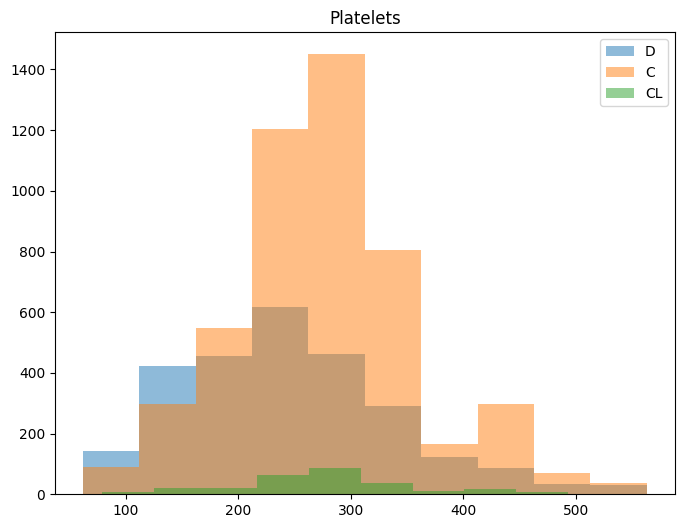

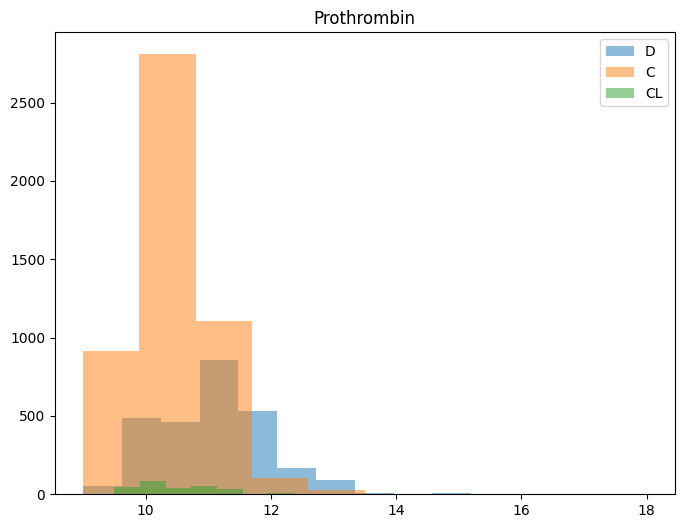

In [13]:
numerical = ["N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]

for feature in numerical:
    fig, axs = plt.subplots(1, 1, figsize=(8,6))
    for status in train_data["Status"].unique():
        axs.hist(train_data.iloc[np.where(train_data["Status"]==status)[0]][feature],linewidth=2.5, label=status, alpha=0.5)
    axs.legend()
    axs.set_title(feature)

## 2. Imputation!

This is the approach we decided to take in the data imputation:
- We are not going to be deleting any Status or id cells.
- There is an equal likelihood of any given cell being deleted in each column.
- We delete data via a binomial random generator with an assigned a probability that any given entry in a column will be deleted. We chose the "small percentage of data missing" to be 15%, so the probability a cell would be deleted is 0.15.
- We then explore these three methods for imputation:
    - Method 1: a simple imputer using the mean of each feature,
    - Method 2: an iterative imputer which uses regression on the other feature values for that row,
    - Method 3: a KNN imputer which looks at k-nearest neighbors in feature-space for that observation.


Below is the code for getting the imputers to work. The code for these imputers will then be taken and plugged into our R notebook to be able to better visualise the difference between them all. In R, we will also graph the distribution of the original missing values and the imputed values, as well as calculating the mean square errors between them to see which imputer was better.

In [14]:
all = categorical + numerical

In [15]:
#Replacing the categorical features as numbers corresponding to each category in order to allow for imputation
train_data.replace({"Drug":{"D-penicillamine":1, "Placebo":0}}, inplace=True)
train_data.replace({"Sex":{"F":0, "M":1}}, inplace=True)
train_data.replace({"Ascites":{"N":0, "Y":1}}, inplace=True)
train_data.replace({"Hepatomegaly":{"N":0, "Y":1}}, inplace=True)
train_data.replace({"Spiders":{"N":0, "Y":1}}, inplace=True)
train_data.replace({"Edema":{"N":0, "S":1, "Y":2}}, inplace=True)
train_data.replace({"Status":{"C":1, "CL":2, "D":3}}, inplace=True)

In [16]:
#Change stage to an integer so the imputer does not impute 
train_data["Stage"] = train_data["Stage"].astype("int64")

### 2.1 Deleting cells

In [17]:
#Here we delete the data via a random distribution per column, where in each column, each cell has a 15% probability to be deleted
train_data_na = train_data.copy(deep=True)
prob = np.random.default_rng()

for col in all:
     for row in range(train_data.shape[0]):
           a = prob.binomial(1, 0.15, size=None)
           if a==1:
               train_data_na.loc[row, col] = np.nan



In [18]:
#Check that entries were indeed deleted
train_data_na

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,NaN,1.0,21532.0,1.0,0.0,0.0,0.0,0.0,2.3,NaN,3.35,NaN,1601.0,179.80,NaN,394.0,9.7,3.0,3
1,1,2574.0,0.0,19237.0,0.0,0.0,0.0,0.0,0.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,NaN,NaN,3.0,1
2,2,3428.0,0.0,13727.0,0.0,0.0,NaN,1.0,2.0,3.3,299.0,3.55,131.0,NaN,119.35,50.0,199.0,11.7,4.0,3
3,3,2576.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1
4,4,NaN,0.0,16658.0,0.0,0.0,1.0,0.0,NaN,1.1,NaN,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166.0,1.0,16839.0,NaN,0.0,0.0,NaN,0.0,0.8,NaN,3.56,NaN,1629.0,79.05,224.0,NaN,NaN,2.0,1
7901,7901,1492.0,0.0,17031.0,NaN,0.0,1.0,0.0,NaN,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,1
7902,7902,1576.0,1.0,25873.0,0.0,0.0,0.0,1.0,1.0,NaN,225.0,3.19,51.0,933.0,69.75,NaN,200.0,NaN,2.0,3
7903,7903,3584.0,1.0,22960.0,1.0,0.0,1.0,0.0,0.0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,3


In [19]:
#Make copies of the data with missing values for the different imputers
train_data_sim = train_data_na.copy(deep=True)
train_data_knn = train_data_na.copy(deep=True)
train_data_iter = train_data_na.copy(deep=True)

In [20]:
#Split the knn data into observations and labels so that the imputer does not look
#at status when calculating the missing values

lab_knn = train_data_knn["Status"]
obs_knn = train_data_knn.drop(columns="Status")

#Do the same thing for the iterative imputer

lab_iter = train_data_iter["Status"]
obs_iter = train_data_iter.drop(columns="Status")


### 2.2 Simple imputation

In [21]:
#Simple imputation, which uses the method "mean"
from sklearn.impute import SimpleImputer

simp = SimpleImputer(strategy="mean")
simp.set_output(transform="pandas")

train_data_sim = simp.fit_transform(train_data_sim)
train_data_sim


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,2026.375279,1.0,21532.000000,1.000000,0.0,0.000000,0.000000,0.00000,2.300000,350.526582,3.35,83.362619,1601.000000,179.80,115.032646,394.000000,9.700000,3.0,3.0
1,1.0,2574.000000,0.0,19237.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.900000,364.000000,3.54,63.000000,1440.000000,134.85,88.000000,265.894573,10.627969,3.0,1.0
2,2.0,3428.000000,0.0,13727.000000,0.000000,0.0,0.516971,1.000000,2.00000,3.300000,299.000000,3.55,131.000000,1823.233468,119.35,50.000000,199.000000,11.700000,4.0,3.0
3,3.0,2576.000000,0.0,18370.707078,0.000000,0.0,0.000000,0.000000,0.00000,0.600000,256.000000,3.50,58.000000,1653.000000,71.30,96.000000,269.000000,10.700000,3.0,1.0
4,4.0,2026.375279,0.0,16658.000000,0.000000,0.0,1.000000,0.000000,0.14034,1.100000,350.526582,3.65,63.000000,1181.000000,125.55,96.000000,298.000000,10.600000,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900.0,1166.000000,1.0,16839.000000,0.072717,0.0,0.000000,0.240608,0.00000,0.800000,350.526582,3.56,83.362619,1629.000000,79.05,224.000000,265.894573,10.627969,2.0,1.0
7901,7901.0,1492.000000,0.0,17031.000000,0.072717,0.0,1.000000,0.000000,0.14034,0.900000,260.000000,3.43,62.000000,1440.000000,142.00,78.000000,277.000000,10.000000,4.0,1.0
7902,7902.0,1576.000000,1.0,25873.000000,0.000000,0.0,0.000000,1.000000,1.00000,2.601756,225.000000,3.19,51.000000,933.000000,69.75,115.032646,200.000000,10.627969,2.0,3.0
7903,7903.0,3584.000000,1.0,22960.000000,1.000000,0.0,1.000000,0.000000,0.00000,0.700000,248.000000,2.75,32.000000,1003.000000,57.35,118.000000,221.000000,10.600000,4.0,3.0


In [22]:
#Need to round the values in each categorical feature
dictionary = {'id': 0, 'N_Days': 0, 'Drug': 0, 'Age': 0, 'Sex': 0, 'Ascites': 0, 'Hepatomegaly': 0, 'Spiders': 0, 'Edema': 0, 'Bilirubin': 1, 'Cholesterol': 1, 'Albumin': 2, 'Copper': 1, 'Alk_Phos': 1, 'SGOT': 2, 'Tryglicerides': 1, 'Platelets': 1, 'Prothrombin': 1, 'Stage': 0} 
print(dictionary)
train_data_sim = train_data_sim.round(dictionary)

{'id': 0, 'N_Days': 0, 'Drug': 0, 'Age': 0, 'Sex': 0, 'Ascites': 0, 'Hepatomegaly': 0, 'Spiders': 0, 'Edema': 0, 'Bilirubin': 1, 'Cholesterol': 1, 'Albumin': 2, 'Copper': 1, 'Alk_Phos': 1, 'SGOT': 2, 'Tryglicerides': 1, 'Platelets': 1, 'Prothrombin': 1, 'Stage': 0}


### 2.3 Regression imputation

Here, we are using an iterative imputer that uses regression on to estimate one feature's value from all other features.

In [23]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

iter = IterativeImputer()
iter.set_output(transform="pandas")

obs_iter = iter.fit_transform(obs_iter)
train_data_iter = pd.concat([obs_iter, lab_iter], axis=1)
train_data_iter

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,1870.977463,1.0,21532.000000,1.000000,0.0,0.000000,0.000000,0.000000,2.300000,456.467813,3.35,121.33164,1601.000000,179.80,124.660698,394.000000,9.700000,3.0,3
1,1.0,2574.000000,0.0,19237.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.900000,364.000000,3.54,63.00000,1440.000000,134.85,88.000000,281.751246,10.471260,3.0,1
2,2.0,3428.000000,0.0,13727.000000,0.000000,0.0,0.852305,1.000000,2.000000,3.300000,299.000000,3.55,131.00000,1806.184854,119.35,50.000000,199.000000,11.700000,4.0,3
3,3.0,2576.000000,0.0,18460.638197,0.000000,0.0,0.000000,0.000000,0.000000,0.600000,256.000000,3.50,58.00000,1653.000000,71.30,96.000000,269.000000,10.700000,3.0,1
4,4.0,2080.487786,0.0,16658.000000,0.000000,0.0,1.000000,0.000000,0.045004,1.100000,344.647021,3.65,63.00000,1181.000000,125.55,96.000000,298.000000,10.600000,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900.0,1166.000000,1.0,16839.000000,0.088325,0.0,0.000000,0.058379,0.000000,0.800000,407.985418,3.56,82.92004,1629.000000,79.05,224.000000,288.791475,10.174285,2.0,1
7901,7901.0,1492.000000,0.0,17031.000000,0.052771,0.0,1.000000,0.000000,0.032990,0.900000,260.000000,3.43,62.00000,1440.000000,142.00,78.000000,277.000000,10.000000,4.0,1
7902,7902.0,1576.000000,1.0,25873.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.812091,225.000000,3.19,51.00000,933.000000,69.75,98.255016,200.000000,11.012851,2.0,3
7903,7903.0,3584.000000,1.0,22960.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.700000,248.000000,2.75,32.00000,1003.000000,57.35,118.000000,221.000000,10.600000,4.0,3


In [24]:
#Need to round the values for each feature
train_data_iter = train_data_iter.round(dictionary)

### 2.4 KNN imputation

In [25]:
#K Nearest Neighbors imputation
from sklearn.impute import KNNImputer

knn = KNNImputer(weights="uniform", n_neighbors=5) #could also set as distance; n_neighbors defaults to 5 but could set something else
knn.set_output(transform="pandas")

obs_knn = knn.fit_transform(obs_knn)
train_data_knn = pd.concat([obs_knn, lab_knn], axis=1)
train_data_knn

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,1954.8,1.0,21532.0,1.0,0.0,0.0,0.0,0.0,2.30,316.0,3.35,72.4,1601.0,179.80,83.0,394.0,9.70,3.0,3
1,1.0,2574.0,0.0,19237.0,0.0,0.0,0.0,0.0,0.0,0.90,364.0,3.54,63.0,1440.0,134.85,88.0,333.6,10.80,3.0,1
2,2.0,3428.0,0.0,13727.0,0.0,0.0,0.2,1.0,2.0,3.30,299.0,3.55,131.0,1157.6,119.35,50.0,199.0,11.70,4.0,3
3,3.0,2576.0,0.0,18924.0,0.0,0.0,0.0,0.0,0.0,0.60,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.70,3.0,1
4,4.0,2871.2,0.0,16658.0,0.0,0.0,1.0,0.0,0.2,1.10,308.6,3.65,63.0,1181.0,125.55,96.0,298.0,10.60,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900.0,1166.0,1.0,16839.0,0.2,0.0,0.0,0.2,0.0,0.80,274.0,3.56,56.2,1629.0,79.05,224.0,253.2,10.56,2.0,1
7901,7901.0,1492.0,0.0,17031.0,0.2,0.0,1.0,0.0,0.4,0.90,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.00,4.0,1
7902,7902.0,1576.0,1.0,25873.0,0.0,0.0,0.0,1.0,1.0,0.82,225.0,3.19,51.0,933.0,69.75,107.0,200.0,10.40,2.0,3
7903,7903.0,3584.0,1.0,22960.0,1.0,0.0,1.0,0.0,0.0,0.70,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.60,4.0,3


In [26]:
#Need to round the values for each feature
train_data_knn = train_data_knn.round(dictionary)
train_data_knn

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0.0,1955.0,1.0,21532.0,1.0,0.0,0.0,0.0,0.0,2.3,316.0,3.35,72.4,1601.0,179.80,83.0,394.0,9.7,3.0,3
1,1.0,2574.0,0.0,19237.0,0.0,0.0,0.0,0.0,0.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,333.6,10.8,3.0,1
2,2.0,3428.0,0.0,13727.0,0.0,0.0,0.0,1.0,2.0,3.3,299.0,3.55,131.0,1157.6,119.35,50.0,199.0,11.7,4.0,3
3,3.0,2576.0,0.0,18924.0,0.0,0.0,0.0,0.0,0.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1
4,4.0,2871.0,0.0,16658.0,0.0,0.0,1.0,0.0,0.0,1.1,308.6,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900.0,1166.0,1.0,16839.0,0.0,0.0,0.0,0.0,0.0,0.8,274.0,3.56,56.2,1629.0,79.05,224.0,253.2,10.6,2.0,1
7901,7901.0,1492.0,0.0,17031.0,0.0,0.0,1.0,0.0,0.0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,1
7902,7902.0,1576.0,1.0,25873.0,0.0,0.0,0.0,1.0,1.0,0.8,225.0,3.19,51.0,933.0,69.75,107.0,200.0,10.4,2.0,3
7903,7903.0,3584.0,1.0,22960.0,1.0,0.0,1.0,0.0,0.0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,3


## 3. Dealing with imbalanced classes

In a paper by N. Chawla (et al) from 2002 (https://arxiv.org/pdf/1106.1813.pdf), it was described that from previous works it has been found that when dealing with imbalanced classes, downsampling was seen to be better than upsampling with replacement, AND better than downsampling together with upsampling with replacement. However, since our minority class (CL) is much smaller than the other two classes, to only downsample would be to lose a very large amount of information. So, we decided we would try downsampling the class C and upsampling the class CL.

This paper also describes a method called SMOTE for upsampling, which looks at k-nearest neighbors in feature space and creates a new instance with feature values as determined by these neighbors. However, in another paper from 2004 (https://dl.acm.org/doi/pdf/10.1145/1007730.1007735), it can be seen in table 4 that using SMOTE in combination with ENN seemed to yield the best results. ENN is a method which undersamples by removing observations that have a certain proportion (either at least one of them, or most) of its nearest neighbors in a different class (i.e. it cleans the boundaries between the classes).

Thus, we will approach dealing with unbalanced classes in two ways: first, a completely random method (random upsampling with replacement and random downsampling), and a nearest-neighbors approach (a combination of the SMOTE and ENN methods).

For both methods, we want to upsample only the class CL (i.e. 2) in order to minimise the amount of information that we "make up". So, we will try to upsample the class CL to make up 20% of the total data, as this is suficient to be considered a mild disbalance (https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data).

For the downsampling, we will allow ENN to downsample the way it does by deafult, only focusing on the majority class (C, i.e. 1). For the random downsampling, we are downsampling the class C (i.e. 1) to be the same size as the class D (i.e. 3).

In [27]:
#Currently, the splittings by class are:
train_data["Status"].value_counts()

Status
1    4965
3    2665
2     275
Name: count, dtype: int64

Currently, there are 7905 entries. We need to upsample CL to x entries, such that x/(7905-275+x) = 0.2. This gives us x=1908. So, we need to upsample CL to be 1908 entries, and downsample C to be 2665 entries.

(Note: when we do this for only a certain proportion of the training set, which we decided would be 80%, these numbers would be 1474 entries for CL and 2153 entries for C. This has been calculated by hand in accordance with the samemethod described above.)

In [28]:
#Split data into the labels (the status classes), and into the data itself, to prepare for the functions:
labels = train_data["Status"]
just_data = train_data.drop(columns="Status")

### 3.1 SMOTE and ENN

In [29]:
#Running the SMOTE and ENN using SMOTEENN:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

#For SMOTEENN, we need to define a SMOTE and ENN function first, to be able to play with the parameters
smot = SMOTE(sampling_strategy={2: 1908}, random_state=5059, k_neighbors=5) 
enn = EditedNearestNeighbours(sampling_strategy="majority", kind_sel="mode")

smoteen = SMOTEENN(smote=smot, enn=enn, random_state=42)

X, Y = smoteen.fit_resample(just_data, labels)

#Concatenate the data with the labels to get the same type of dataframe as before
new_data = pd.concat([X, Y], axis=1)
new_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1,2574,0,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3,1
1,3,2576,0,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3,1
2,4,788,0,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4,1
3,6,1300,0,17703,0,0,0,0,0,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3,1
4,7,1615,0,21281,0,0,1,0,0,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8457,7894,935,0,21699,0,0,1,0,0,4.0,358.0,3.23,219.0,2468.0,201.50,205.0,233.0,11.5,3,3
8458,7898,77,0,19884,0,1,1,0,2,5.1,178.0,2.75,464.0,1020.0,120.90,118.0,80.0,12.3,4,3
8459,7899,1413,0,24622,0,0,0,0,0,1.3,262.0,3.73,65.0,2045.0,89.90,78.0,181.0,11.0,3,3
8460,7902,1576,1,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2,3


#### 3.1.1 Graphing new distributions

These can then be used to look back at the original distributions found in section 1 of this notebook to see if the methods used here significantly change anything.

In [30]:
new_data["Status"].value_counts()

Status
1    3889
3    2665
2    1908
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='proportion'>

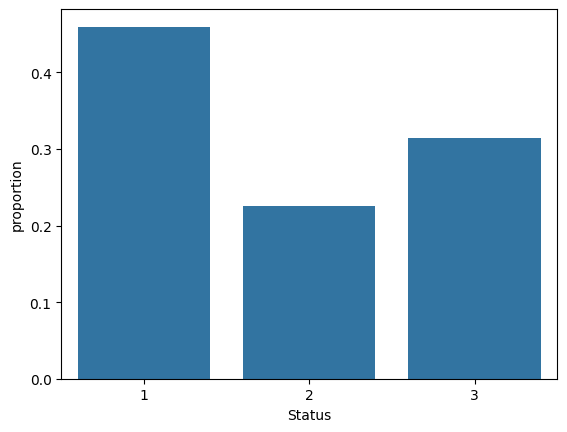

In [31]:
#New class distribution
x, y, hue = "Status", "proportion", "Status"
(new_data[x]
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y))

##### 3.1.1.1 Categorical features

<Axes: xlabel='Drug', ylabel='proportion'>

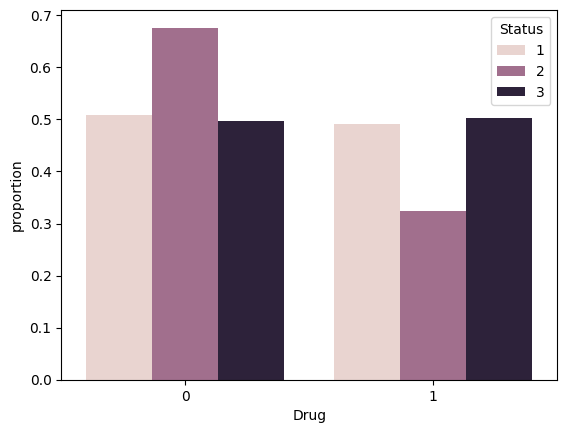

In [32]:
x, y, hue = "Drug", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Sex', ylabel='proportion'>

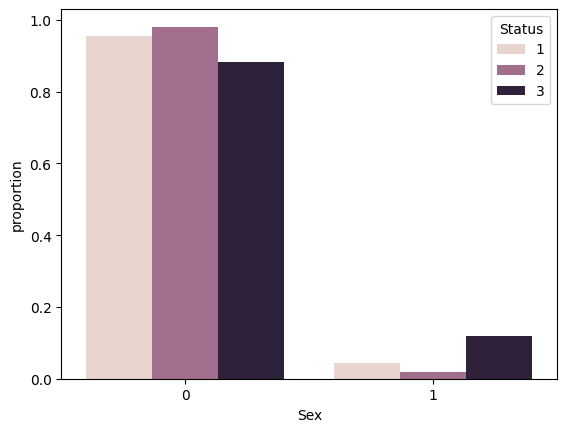

In [33]:
x, y, hue = "Sex", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Ascites', ylabel='proportion'>

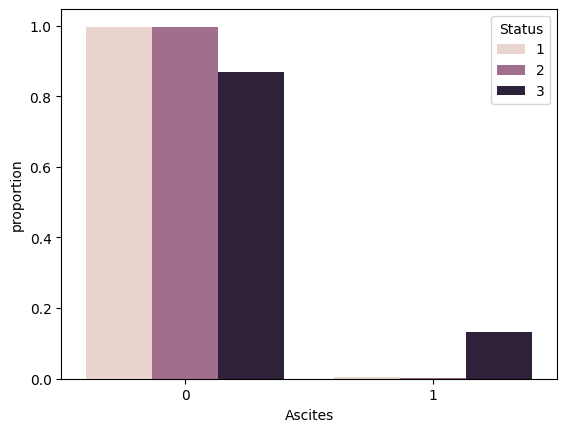

In [34]:
x, y, hue = "Ascites", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Hepatomegaly', ylabel='proportion'>

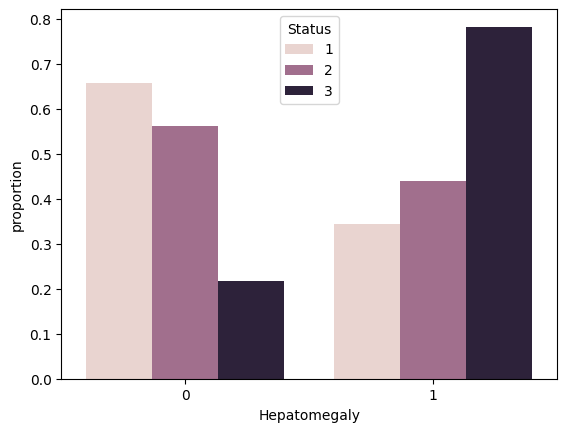

In [35]:
x, y, hue = "Hepatomegaly", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Spiders', ylabel='proportion'>

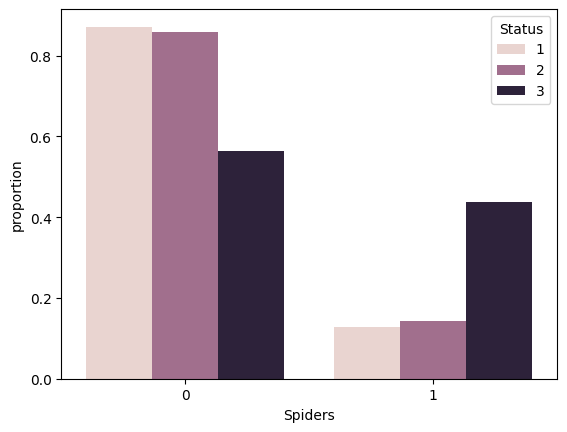

In [36]:
x, y, hue = "Spiders", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Edema', ylabel='proportion'>

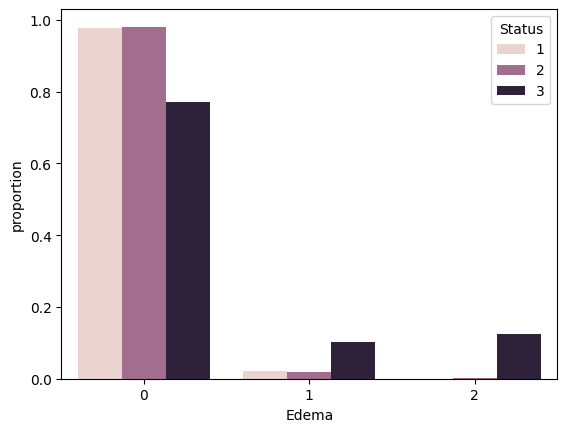

In [37]:
x, y, hue = "Edema", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Stage', ylabel='proportion'>

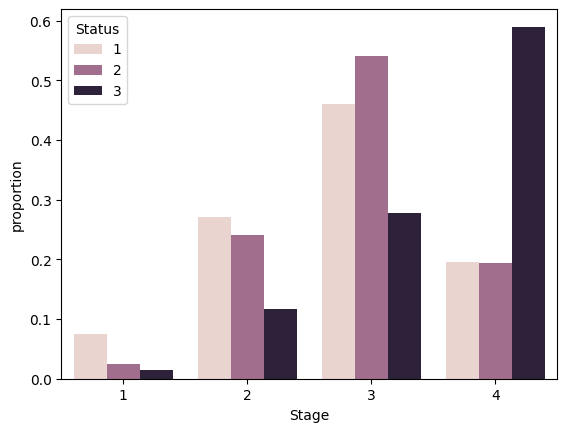

In [38]:
x, y, hue = "Stage", "proportion", "Status"
(new_data[x]
 .groupby(new_data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

Comparing with the distributions graphed in section 1, we can see that this method has changed a lot of the categorical features' distributions, but only really for the class CL. For example, CL had most of its observations as taking the drug. However, after synthetically creating entries, we see now that a majority of CL is on the placebo. A similar sort of change is seen in every categorical feature.

##### 3.1.1.2 Numerical features

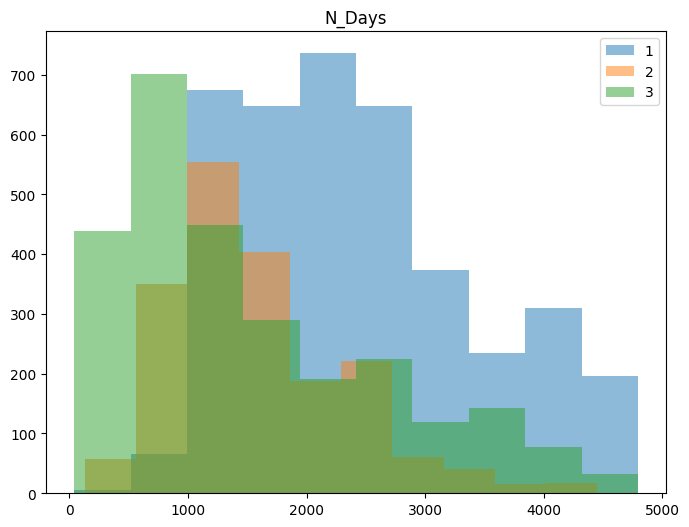

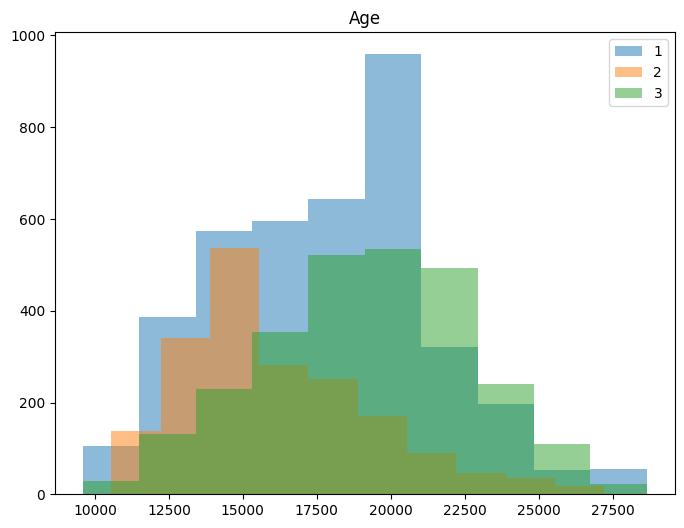

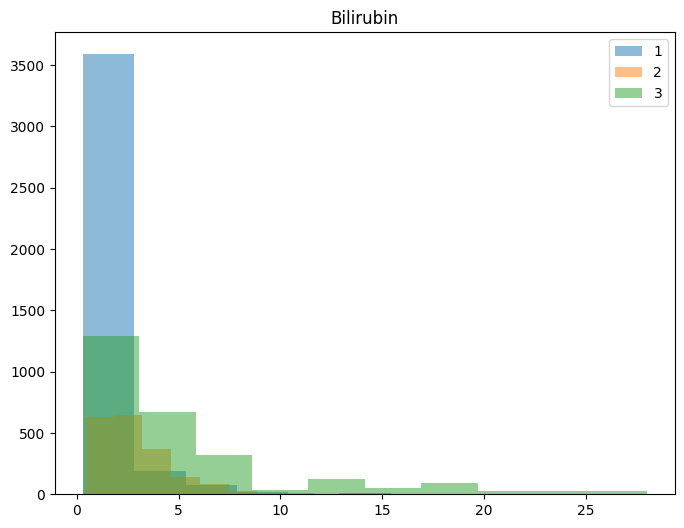

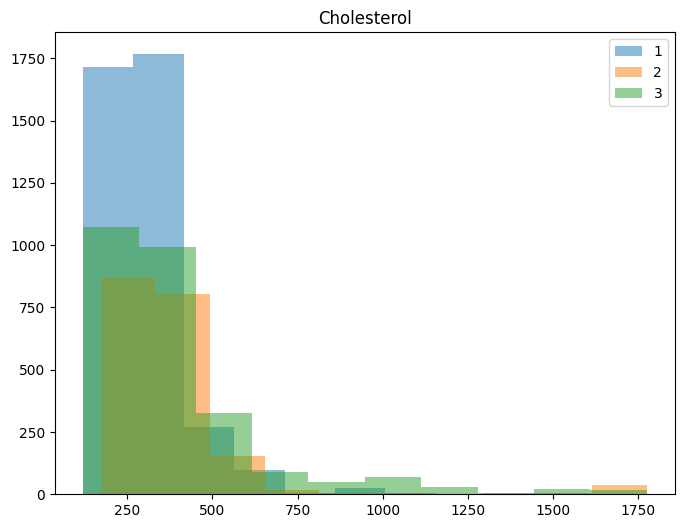

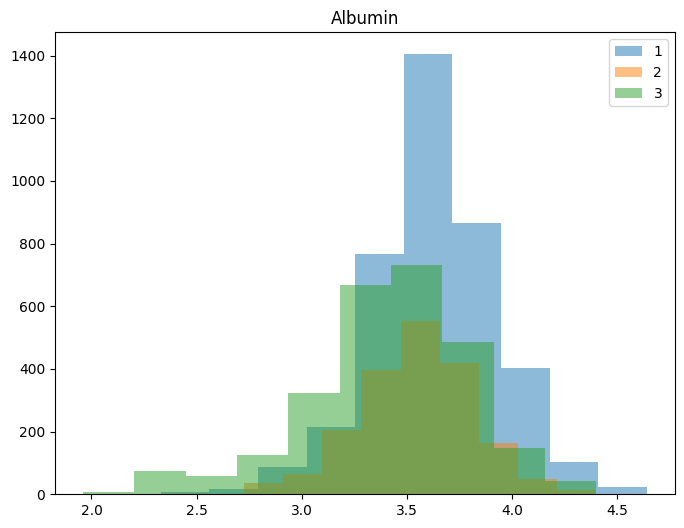

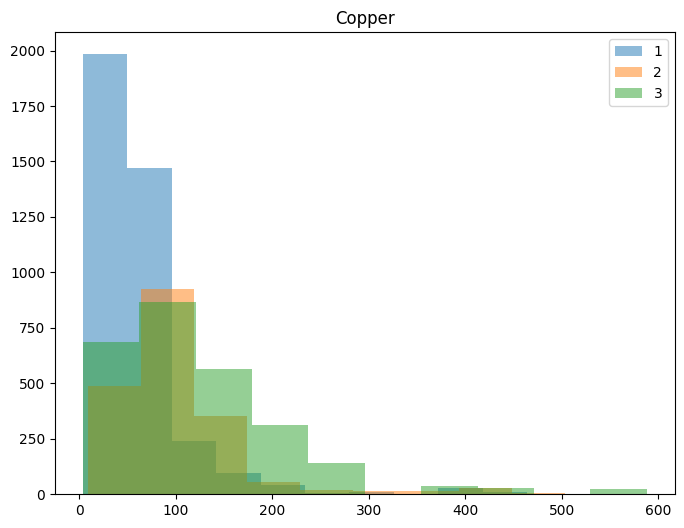

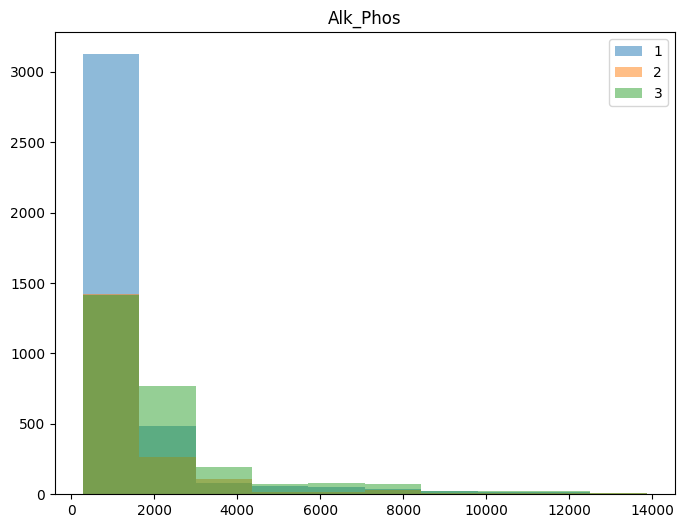

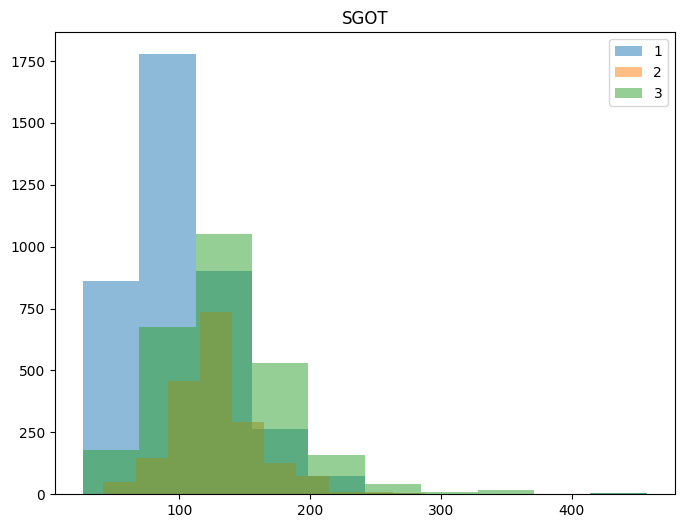

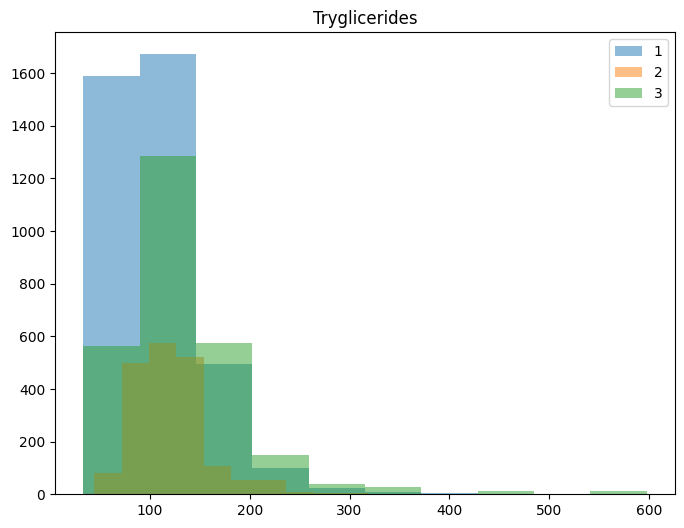

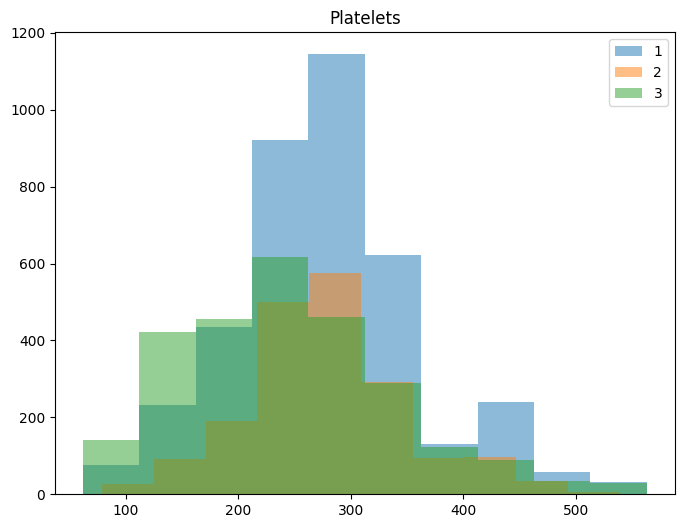

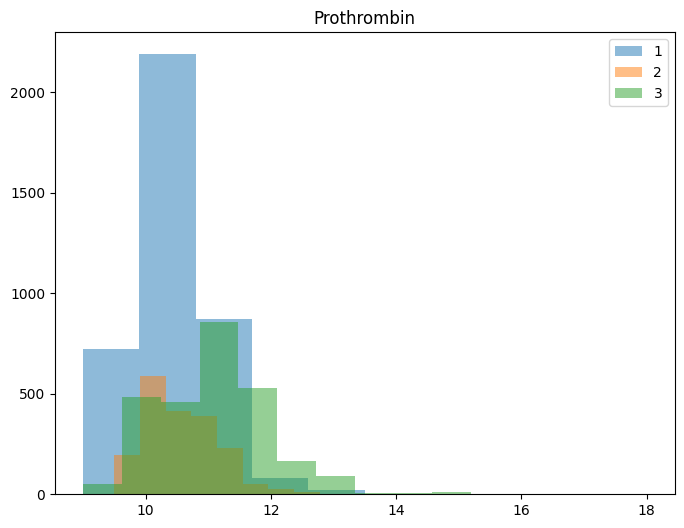

In [39]:
#graph numerical features
for feature in numerical:
    fig, axs = plt.subplots(1, 1, figsize=(8,6))
    for status in new_data["Status"].unique():
        axs.hist(new_data.iloc[np.where(new_data["Status"]==status)[0]][feature],linewidth=2.5, label=status, alpha=0.5)
    axs.legend()
    axs.set_title(feature)

Comparing with the graphs in section 1, it seems that most of the numerical features' distributions are respected. The only changes are that the class CL now has more prominent histograms (as there are more entries), but they seem to more or less respect the original shapes from section 1.

### 3.2 Random oversampling and random downsampling

In [40]:
#Random upsampling:
from imblearn.over_sampling import RandomOverSampler

r_up = RandomOverSampler(sampling_strategy={2: 1908}, random_state=5059)
X, Y = r_up.fit_resample(just_data, labels)

#We don't concatenate the data with the labels for now, as the downsampler also needs them passed in separately

#Random downsampling:
from imblearn.under_sampling import RandomUnderSampler

r_down = RandomUnderSampler(sampling_strategy={1: 2665}, random_state=5059)
X, Y = r_down.fit_resample(X, Y)

#Concatenate the data with the labels to get the same type of dataframe as before
new_data_2 = pd.concat([X, Y], axis=1)
new_data_2

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
3253,3253,1945,1,20442,0,0,1,0,0,0.6,235.0,3.40,39.0,1142.0,74.40,111.0,123.0,11.0,4,1
7696,7696,2563,0,25568,0,0,1,1,0,1.1,168.0,3.07,464.0,944.0,120.90,146.0,278.0,11.0,4,1
473,473,1785,0,20256,0,0,0,0,0,0.4,210.0,3.44,44.0,766.0,57.35,108.0,165.0,10.5,3,1
7025,7025,1925,0,19994,0,0,1,1,0,0.9,276.0,3.43,143.0,648.0,106.95,62.0,224.0,10.3,4,1
4100,4100,1536,0,15105,0,0,0,0,0,0.9,302.0,4.30,58.0,758.0,52.70,104.0,227.0,10.3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,7894,935,0,21699,0,0,1,0,0,4.0,358.0,3.23,219.0,2468.0,201.50,205.0,233.0,11.5,3,3
7898,7898,77,0,19884,0,1,1,0,2,5.1,178.0,2.75,464.0,1020.0,120.90,118.0,80.0,12.3,4,3
7899,7899,1413,0,24622,0,0,0,0,0,1.3,262.0,3.73,65.0,2045.0,89.90,78.0,181.0,11.0,3,3
7902,7902,1576,1,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2,3


#### 3.2.1 Graphing new distributions

In [41]:
new_data_2["Status"].value_counts()

Status
1    2665
3    2665
2    1908
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='proportion'>

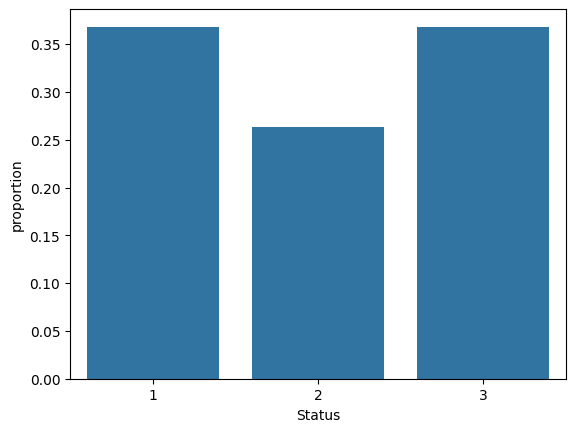

In [42]:
x, y, hue = "Status", "proportion", "Status"
(new_data_2[x]
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y))

##### 3.2.1.1 Categorical features

<Axes: xlabel='Drug', ylabel='proportion'>

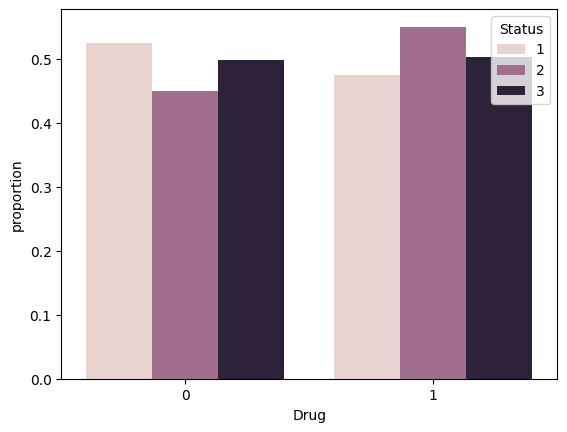

In [43]:
x, y, hue = "Drug", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Sex', ylabel='proportion'>

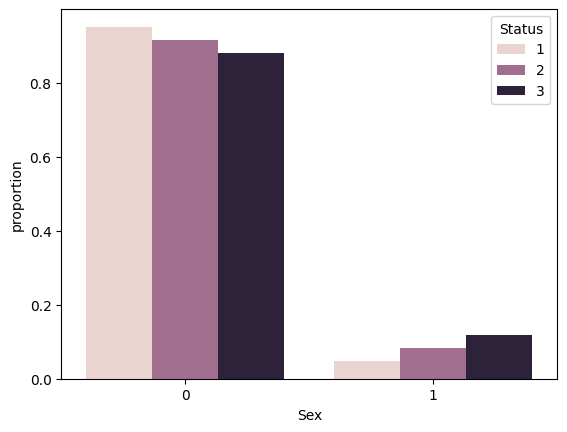

In [44]:
x, y, hue = "Sex", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Ascites', ylabel='proportion'>

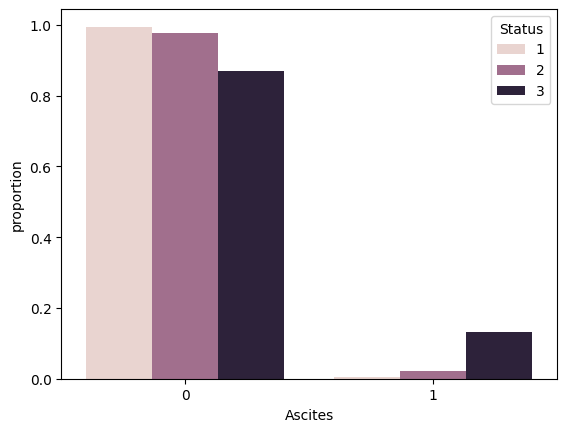

In [45]:
x, y, hue = "Ascites", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Hepatomegaly', ylabel='proportion'>

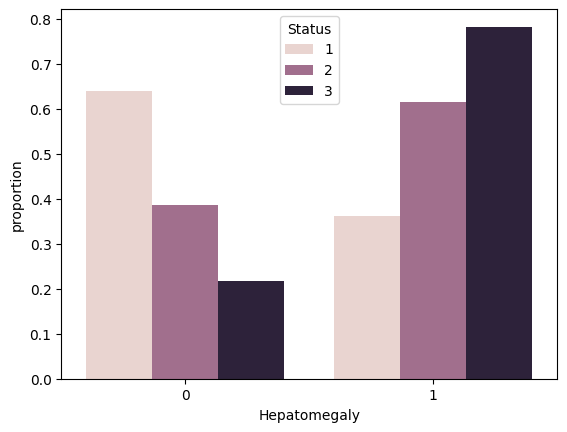

In [46]:
x, y, hue = "Hepatomegaly", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Spiders', ylabel='proportion'>

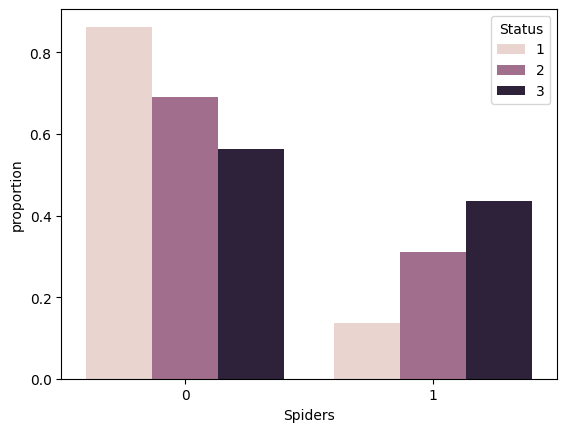

In [47]:
x, y, hue = "Spiders", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Edema', ylabel='proportion'>

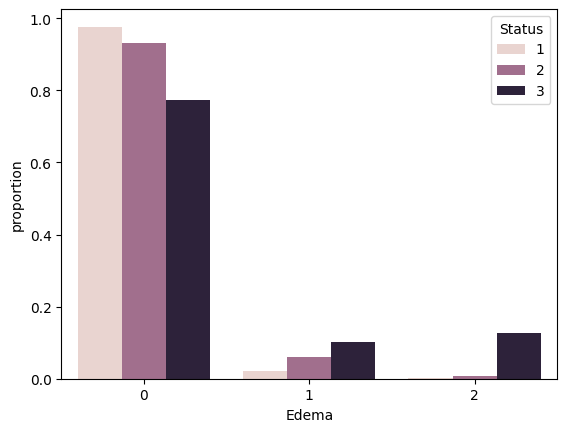

In [48]:
x, y, hue = "Edema", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

<Axes: xlabel='Stage', ylabel='proportion'>

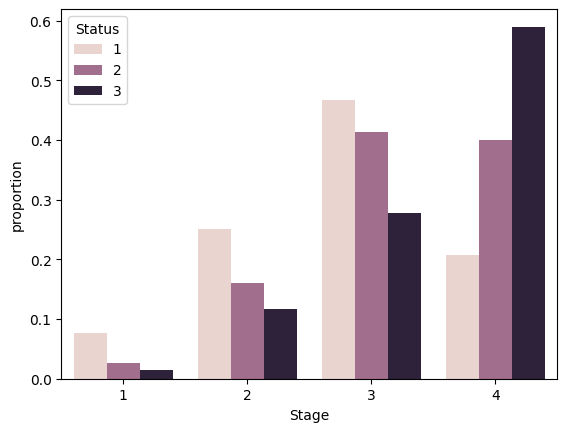

In [49]:
x, y, hue = "Stage", "proportion", "Status"
(new_data_2[x]
 .groupby(new_data_2[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

The distributions of the categorical features after the upsampling look basically the same as those in section 1! This is a good thing, as it means we most likely will not be introducing false trends into the model via the upsampling.

##### 3.2.1.2 Numerical features

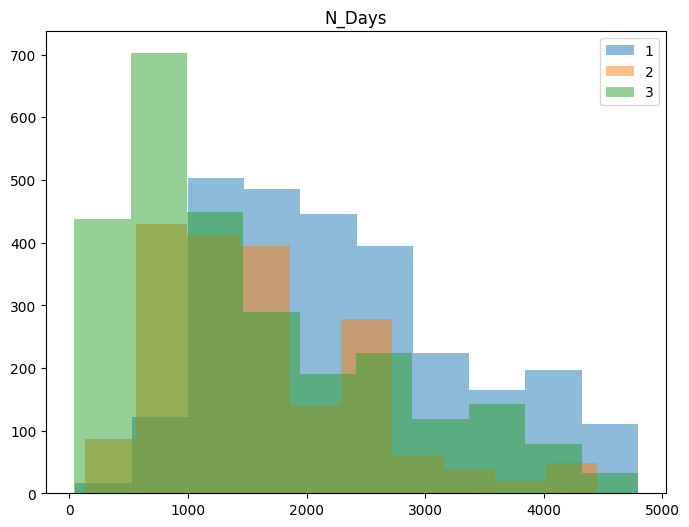

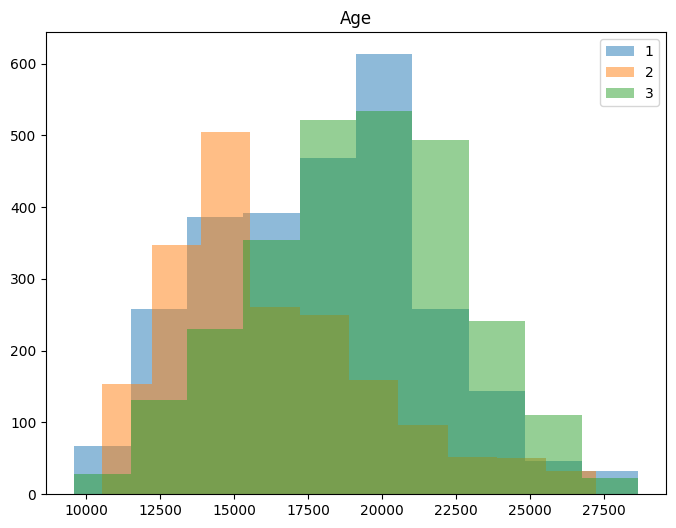

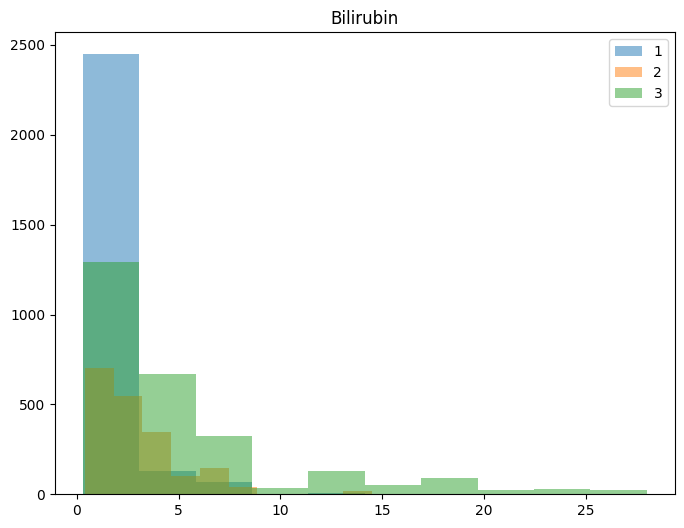

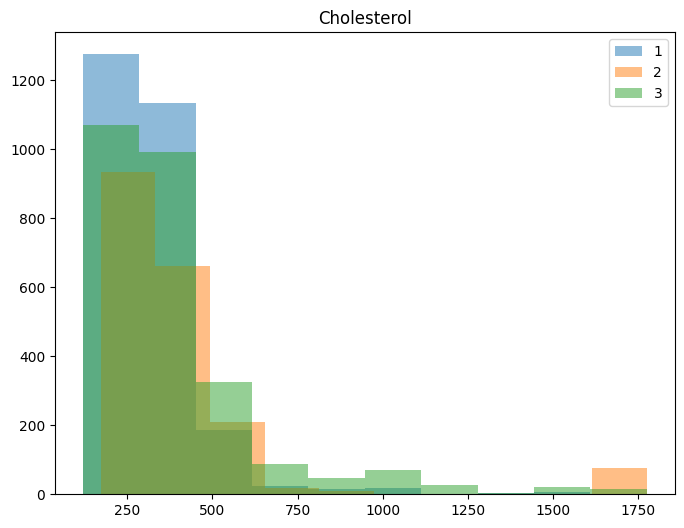

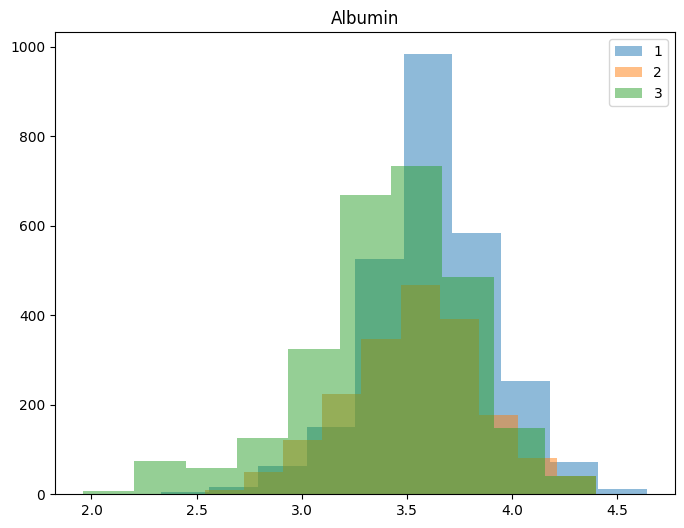

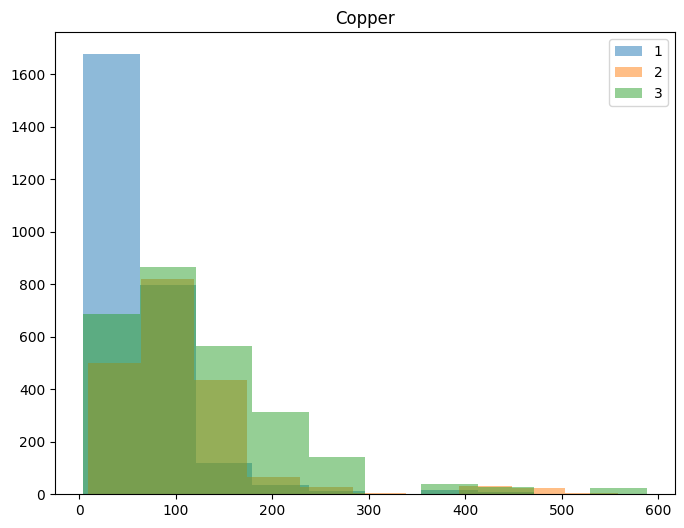

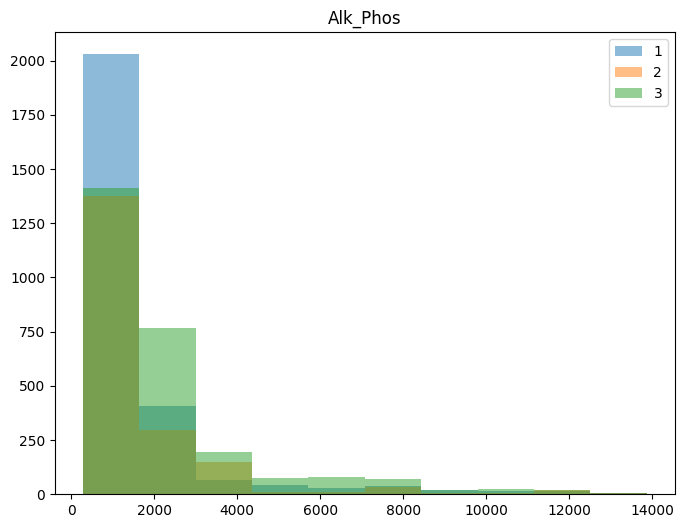

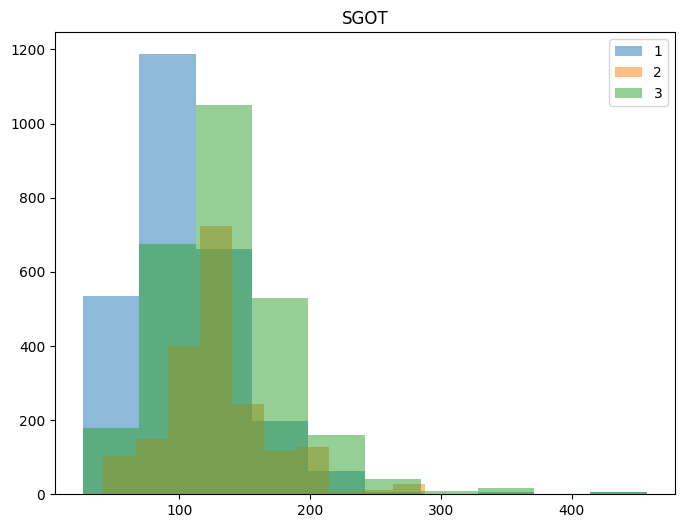

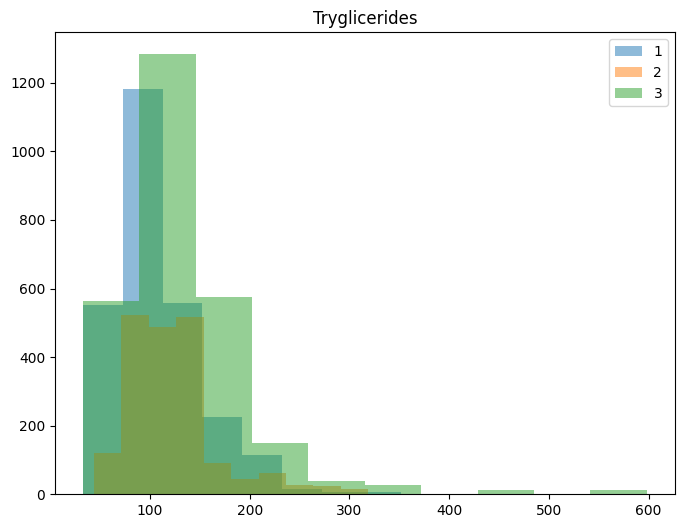

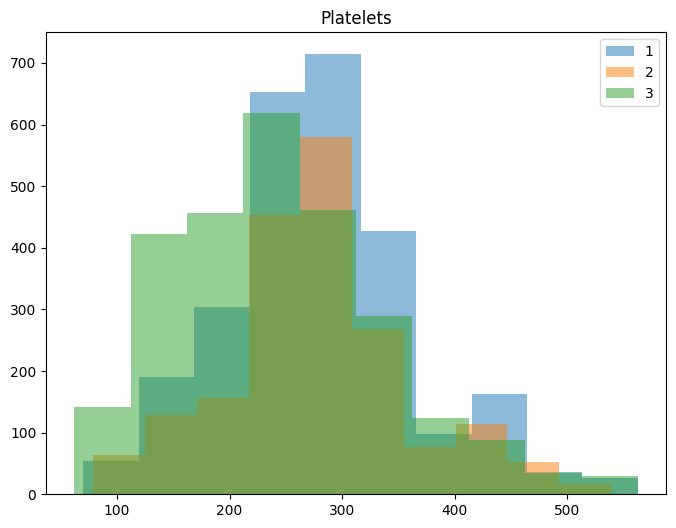

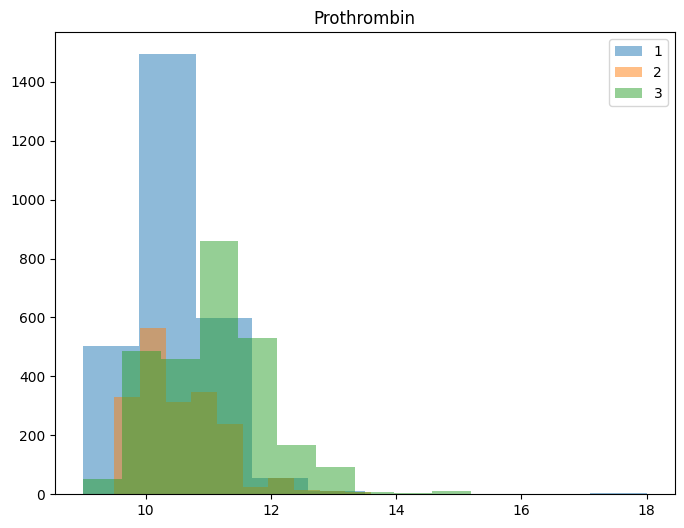

In [50]:
#graph numerical features
for feature in numerical:
    fig, axs = plt.subplots(1, 1, figsize=(8,6))
    for status in new_data_2["Status"].unique():
        axs.hist(new_data_2.iloc[np.where(new_data_2["Status"]==status)[0]][feature],linewidth=2.5, label=status, alpha=0.5)
    axs.legend()
    axs.set_title(feature)

The changes to the numerical features' distributions are similar to those when applying teh SMOTEENN method.

## 4. Scaling the data

Since the numerical data we have has distributions with a lot of outliers, we will use standard scaling to minimise the effects of the outliers.
Below I show the scaling method (and make sure it works) before putting it together with everything else into a pipeline.

In [51]:
from sklearn.preprocessing import StandardScaler

numerical_data = train_data.drop(columns=['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'id', 'Status'])
rest_data = train_data.drop(columns=numerical)

scale = StandardScaler()
scaled_num = scale.fit_transform(numerical_data)

# convert to pandas data frame object.
scaled_num = pd.DataFrame(scaled_num, columns=numerical_data.columns, index=numerical_data.index)
scaled_data = pd.concat([rest_data, scaled_num], axis=1)

scaled_data

,id,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,1,1,0,0,0,0,3,3,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049
1,1,0,0,0,0,0,0,3,1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024
2,2,0,0,0,1,1,2,4,3,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525
3,3,0,0,0,0,0,0,3,1,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238
4,4,0,0,0,1,0,0,4,1,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1,0,0,0,0,0,2,1,-0.789802,-0.416919,-0.470657,-0.212738,0.033735,-0.604825,-0.098625,-0.728759,2.068644,0.900652,-0.933192
7901,7901,0,0,0,1,0,0,4,1,-0.491858,-0.364741,-0.444429,-0.463548,-0.341826,-0.288596,-0.197909,0.561521,-0.710875,0.134588,-0.805263
7902,7902,1,0,0,0,1,1,2,3,-0.415087,2.038155,-0.155921,-0.642698,-1.035169,-0.433534,-0.464242,-0.919380,-1.015479,-0.745814,2.648812
7903,7903,1,1,0,1,0,0,4,3,1.420103,1.246520,-0.496885,-0.524971,-2.306298,-0.683882,-0.427470,-1.173542,0.050637,-0.505705,-0.037691


## 5. Pipeline

This is the order in which we will process the data:
- Change categorical data to integers (within the pipeline);
- Impute missing values (within the pipeline);
- Deal with unbalanced classes (within the pipeline);
- Scale the numeric data;
- Hot encode the categorical features.
We are imputing before dealing with unbalanced classes as we do not want to impute the missing values from "made up" data.  
We are also not removing any features at this point: we want to run a model with all features and run a feature importance check.

We will combine the three imputation methods with the two unbalanced classes methods in order to get 6 different combinations of prepared data. This way, we can see which of the combinations performs best when we run our models, and can then select it for our final model.

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [53]:
#Example usage: pipeline(train, "simple", "smoteenn", "yes")
#options for imputer: "simple", "regression", "knn"
#options for unbalanced: "smoteen", "random"
#options for delete: "yes" if training data, "no" if validation
def pipeline(df1, imputer, unbalanced, delete="no"):
    df = df1.copy()
    categorical = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"] #?
    numerical = ["Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"] #?
    all = categorical + numerical

    #Replacing the categorical features as numbers corresponding to each category in order to allow for imputation
    df.replace({"Drug":{"D-penicillamine":1, "Placebo":0}}, inplace=True)
    df.replace({"Sex":{"F":0, "M":1}}, inplace=True)
    df.replace({"Ascites":{"N":0, "Y":1}}, inplace=True)
    df.replace({"Hepatomegaly":{"N":0, "Y":1}}, inplace=True)
    df.replace({"Spiders":{"N":0, "Y":1}}, inplace=True)
    df.replace({"Edema":{"N":0, "S":1, "Y":2}}, inplace=True)
    df.replace({"Status":{"C":1, "CL":2, "D":3}}, inplace=True)
    df["Stage"] = df["Stage"].astype("int64")
    

    #Here we see if we want to delete data.
    #If yes, we delete the data via a random distribution per column, where in each column, each cell has a 15% probability to be deleted
    if delete=="yes":
        prob = np.random.default_rng()
        for col in all:
            for row in df.index:
                a = prob.binomial(1, 0.15, size=None)
                if a==1:
                    df.loc[row, col] = np.nan
    elif delete=="no":
        df = df

    lab = df["Status"].astype("int64")
    obs = df.drop(columns=["Status", "N_Days"])
    
    #Defining the three imputers we could define
    if imputer=="simple":
        df = pd.concat([obs, lab], axis=1)
        simp = SimpleImputer(strategy="mean")
        simp.set_output(transform="pandas")
        df = simp.fit_transform(df)
    elif imputer=="regression":
        iter = IterativeImputer()
        iter.set_output(transform="pandas")
        obs = iter.fit_transform(obs)
        df = pd.concat([obs, lab], axis=1)
    elif imputer=="knn":
        knn = KNNImputer(weights="uniform", n_neighbors=5)
        knn.set_output(transform="pandas")
        obs = knn.fit_transform(obs)
        df = pd.concat([obs, lab], axis=1)
    
    dictionary = {'id': 0, 'Drug': 0, 'Age': 0, 'Sex': 0, 'Ascites': 0, 
                  'Hepatomegaly': 0, 'Spiders': 0, 'Edema': 0, 'Bilirubin': 1, 'Cholesterol': 1, 
                  'Albumin': 2, 'Copper': 1, 'Alk_Phos': 1, 'SGOT': 2, 'Tryglicerides': 1, 'Platelets': 1, 'Prothrombin': 1, 'Stage': 0} 

    df = df.round(dictionary)

    lab = df["Status"].astype("int64")
    obs = df.drop(columns=["Status"])

    #Dealing with the unbalanced classes
    if unbalanced=="smoteenn":
        smot = SMOTE(sampling_strategy={2 : 1474}, random_state=5059, k_neighbors=5) 
        enn = EditedNearestNeighbours(sampling_strategy="majority", kind_sel="mode")
        smoteen = SMOTEENN(smote=smot, enn=enn, random_state=42)
        X, Y = smoteen.fit_resample(obs, lab)
        df = pd.concat([X, Y], axis=1)
    elif unbalanced=="random":
        r_up = RandomOverSampler(sampling_strategy={2 : 1474}, random_state=5059)
        X, Y = r_up.fit_resample(obs, lab)
        r_down = RandomUnderSampler(sampling_strategy={1 : 2153}, random_state=5059)
        X, Y = r_down.fit_resample(X, Y)
        df = pd.concat([X, Y], axis=1)
    elif unbalanced=="none":
        df = df
    return df

## 6. Preparing train and test sets

Here we split the data into a training and a validation set, and then apply the data processing to the new data set.

In [54]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.set_output(transform="pandas")

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

categorical = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"] #?
numerical = ["Age", "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"] #?

#Split the training set into training and validation (in a reproducible manner):
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2, random_state=5059)


## 7. Models
#### To tune and evaluate the models we : 
1. Tried each type of model we wanted to test against different configurations of the test data 
    * varied imputation and balancing methods
    * evaluated the result of each model with the different configurations
2. Picked the 2 most promising models 
3. Tuned those 2 
4. Compared the results 

### Evaluation function
##### We used a common evaluation function to evaluate the performance of all the models, this helped us ensure that all the models were evaluated in the same way and avoided repeated code. The evaluation function :
1. Plots a confusion matrix 
2. Outputs the accuracy for the model
3. Outputs a classification report to compare performance for the classes 
4. Outputs the number of classes found
5. Outputs the log loss as required 

In [55]:
import sklearn.metrics
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

# a utility function to produce metrics on each model and a confusion matrix
def evaluate(model, test_x, test_y):
    predictions = model.predict(test_x)
    m = sklearn.metrics.confusion_matrix(test_y, predictions)
    plt.figure()
    
    # confusion matrix
    seaborn.heatmap(m, annot=True, fmt='d', cmap='binary', annot_kws={"fontsize":10})
    plt.show()
    
    # accuracy
    accuracy = sklearn.metrics.accuracy_score(test_y, predictions)
    print("Accuracy: ", accuracy)
    
    # precision, recall, f1-score
    report = sklearn.metrics.classification_report(test_y, predictions)
    print("Classification Report:\n", report)
    
    # get unique classes
    unique_classes = np.unique(test_y)
    unique_classes_pred = np.unique(predictions)
    print("Unique Classes: ", unique_classes)
    print("Unique Predicted Classes: ", unique_classes_pred)
    
    # log loss requires probabilities so we need to use predict_proba
    pred_probs = model.predict_proba(test_x)
    # log loss
    logLoss = log_loss(test_y, pred_probs)
    print("Log Loss: ", logLoss)


# Example usage:
# evaluate(your_model, test_x, test_y)


### ROC function
#### This function plots the roc curves for 1 class vs the other 2

#### The class is specified in the arguments along with the label for the axis and the graph


In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

#from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#plots the roc curve
def plotROC(model,class_to_plot,test,test_y,train_y,labelForGraph, className):
    
    #one hot encode the different classes
    label_binarizer = LabelBinarizer().fit(train_y)
    y_onehot_test = label_binarizer.transform(test_y)

    #get the probabilities 
    preds = model.predict_proba(test)
    #plot the graph
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_to_plot],
        preds[:, class_to_plot],
        name= className + "vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=labelForGraph,
    )

### Test_Model runs through the different configurations 
##### For a given model the function iterates over the different imputer and balancing options 

In [57]:
def test_model(model):
    imputer_options = ["simple", "regression", "knn"]
    balancing_options = ["smoteenn", "random"]

    for imputer in imputer_options:
        for balancing in balancing_options:

            print("*" * 100)
            print("Model: ",model,   "Imputer: ", imputer, " Balancing: ", balancing)
            train_data = pipeline(train, imputer, balancing)
            test = pipeline(val, imputer, "none")


            # Process training data
            train_y = train_data["Status"]
            train_data_numeric = train_data.drop(columns=categorical+["id", "Status"])
            train_data_num = scale.fit_transform(train_data_numeric)
            train_data_num = pd.DataFrame(train_data_num, columns=train_data_numeric.columns, index=train_data_numeric.index)

            train_data_cat = train_data.drop(columns=numerical+["id", "Status"])
            train_data_cat = one_hot_encoder.fit_transform(train_data_cat)

            train_data = pd.concat([train_data_cat, train_data_num], axis=1)

            # Process test data
            test_y = test["Status"]
            test_numeric = test.drop(columns=categorical+["id", "Status"])
            test_num = scale.transform(test_numeric)
            test_num = pd.DataFrame(test_num, columns=test_numeric.columns, index=test_numeric.index)

            test_cat = test.drop(columns=numerical+["id", "Status"])
            test_cat = one_hot_encoder.transform(test_cat)

            test = pd.concat([test_cat, test_num], axis=1)
            train_y = train_y.astype(int) - 1
            test_y = test_y.astype(int) - 1
            # Fit the model
            model.fit(train_data, train_y)
            evaluate(model, test, test_y)


## Picking the promising model in combination with best imputation and class balancing methods.

****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  simple  Balancing:  smoteenn


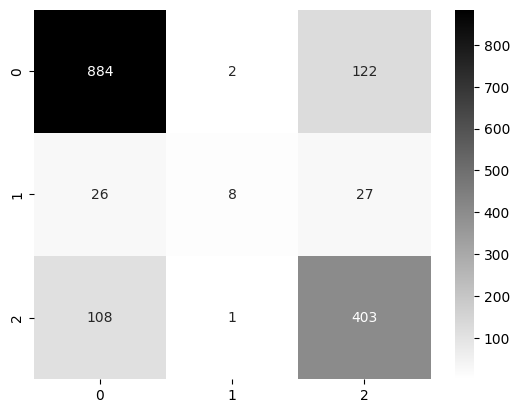

Accuracy:  0.8191018342820999
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1008
           1       0.73      0.13      0.22        61
           2       0.73      0.79      0.76       512

    accuracy                           0.82      1581
   macro avg       0.78      0.60      0.62      1581
weighted avg       0.82      0.82      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5230063336270471
****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  simple  Balancing:  random


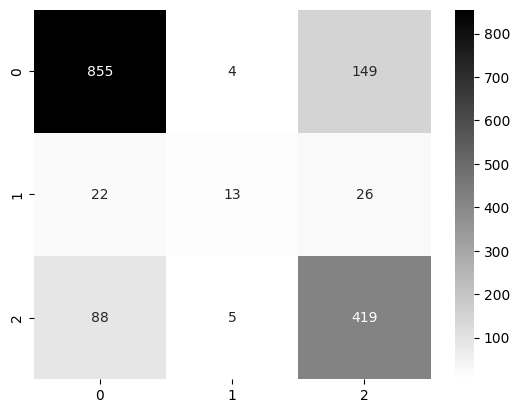

Accuracy:  0.8140417457305503
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1008
           1       0.59      0.21      0.31        61
           2       0.71      0.82      0.76       512

    accuracy                           0.81      1581
   macro avg       0.73      0.63      0.65      1581
weighted avg       0.82      0.81      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5739163398067442
****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  regression  Balancing:  smoteenn


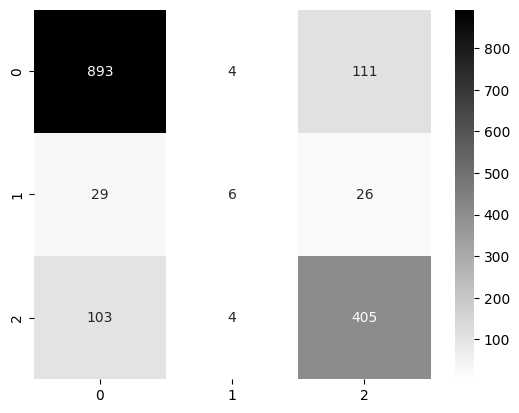

Accuracy:  0.8247944339025933
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1008
           1       0.43      0.10      0.16        61
           2       0.75      0.79      0.77       512

    accuracy                           0.82      1581
   macro avg       0.68      0.59      0.60      1581
weighted avg       0.81      0.82      0.82      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5423287826957909
****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  regression  Balancing:  random


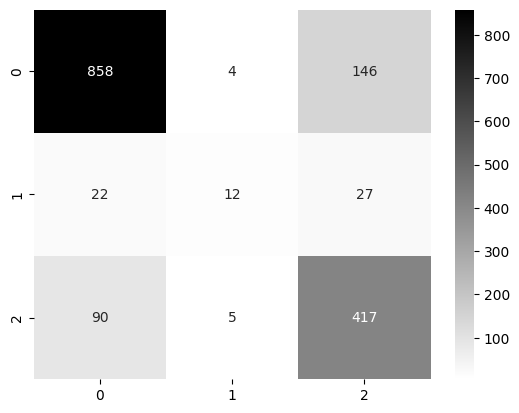

Accuracy:  0.8140417457305503
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1008
           1       0.57      0.20      0.29        61
           2       0.71      0.81      0.76       512

    accuracy                           0.81      1581
   macro avg       0.72      0.62      0.64      1581
weighted avg       0.81      0.81      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5578492194974967
****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  knn  Balancing:  smoteenn


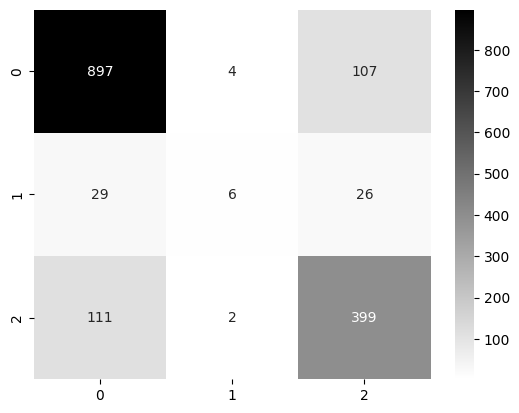

Accuracy:  0.8235294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1008
           1       0.50      0.10      0.16        61
           2       0.75      0.78      0.76       512

    accuracy                           0.82      1581
   macro avg       0.70      0.59      0.60      1581
weighted avg       0.81      0.82      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5393842101059196
****************************************************************************************************
Model:  RandomForestClassifier() Imputer:  knn  Balancing:  random


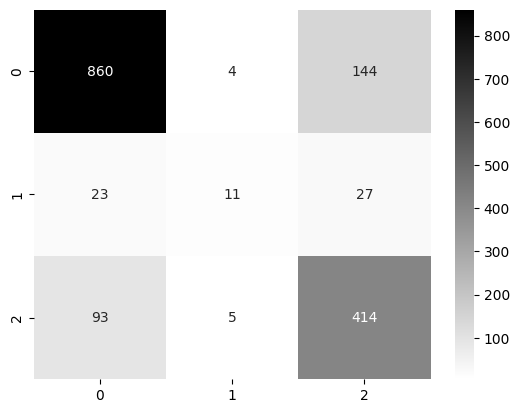

Accuracy:  0.8127767235926628
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      1008
           1       0.55      0.18      0.27        61
           2       0.71      0.81      0.75       512

    accuracy                           0.81      1581
   macro avg       0.71      0.61      0.63      1581
weighted avg       0.81      0.81      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5745387691000506
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  simple  Balancing:  smoteenn


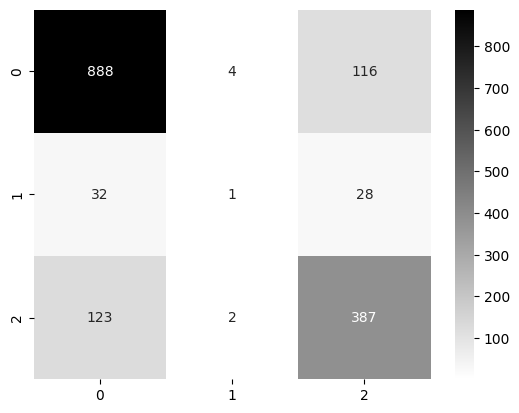

Accuracy:  0.8070841239721696
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1008
           1       0.14      0.02      0.03        61
           2       0.73      0.76      0.74       512

    accuracy                           0.81      1581
   macro avg       0.57      0.55      0.55      1581
weighted avg       0.78      0.81      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5295612451978556
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  simple  Balancing:  random


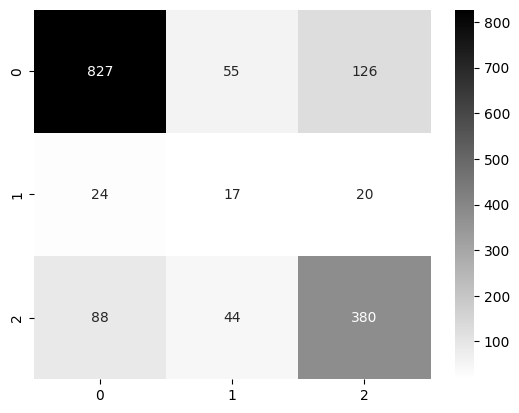

Accuracy:  0.7741935483870968
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1008
           1       0.15      0.28      0.19        61
           2       0.72      0.74      0.73       512

    accuracy                           0.77      1581
   macro avg       0.58      0.61      0.59      1581
weighted avg       0.80      0.77      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.6071656260384852
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  regression  Balancing:  smoteenn


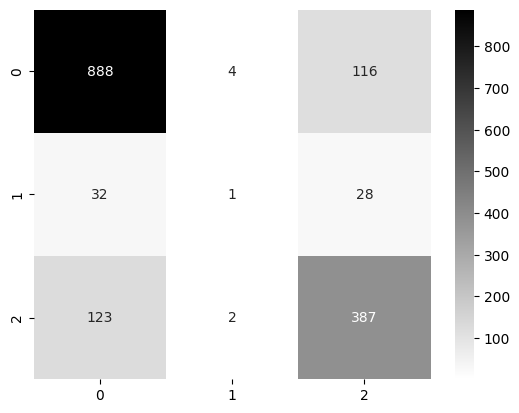

Accuracy:  0.8070841239721696
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1008
           1       0.14      0.02      0.03        61
           2       0.73      0.76      0.74       512

    accuracy                           0.81      1581
   macro avg       0.57      0.55      0.55      1581
weighted avg       0.78      0.81      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5302138198971381
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  regression  Balancing:  random


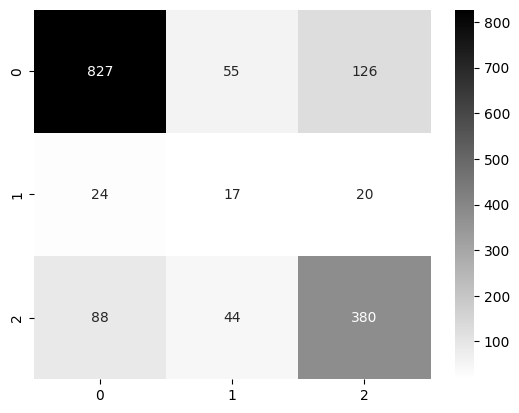

Accuracy:  0.7741935483870968
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1008
           1       0.15      0.28      0.19        61
           2       0.72      0.74      0.73       512

    accuracy                           0.77      1581
   macro avg       0.58      0.61      0.59      1581
weighted avg       0.80      0.77      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.6065782180755136
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  knn  Balancing:  smoteenn


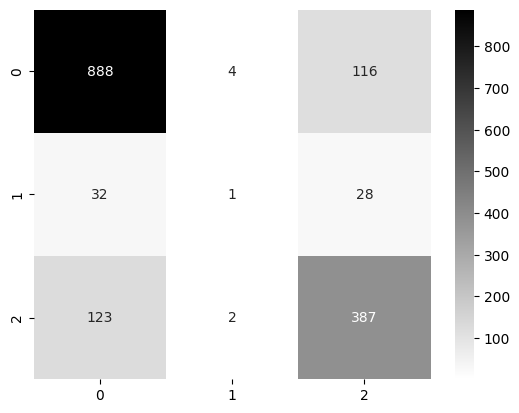

Accuracy:  0.8070841239721696
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1008
           1       0.14      0.02      0.03        61
           2       0.73      0.76      0.74       512

    accuracy                           0.81      1581
   macro avg       0.57      0.55      0.55      1581
weighted avg       0.78      0.81      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5302126032120923
****************************************************************************************************
Model:  SVC(probability=True) Imputer:  knn  Balancing:  random


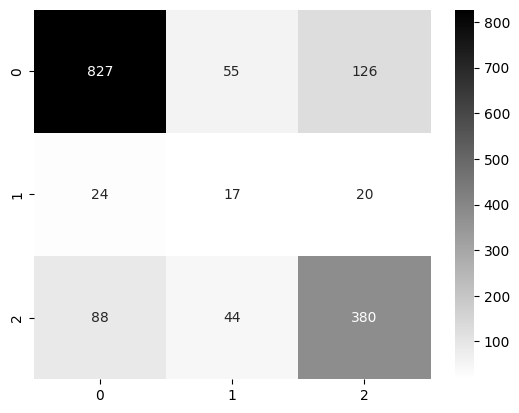

Accuracy:  0.7741935483870968
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1008
           1       0.15      0.28      0.19        61
           2       0.72      0.74      0.73       512

    accuracy                           0.77      1581
   macro avg       0.58      0.61      0.59      1581
weighted avg       0.80      0.77      0.79      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.60705210703618
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  simple  Balancing:  smoteenn


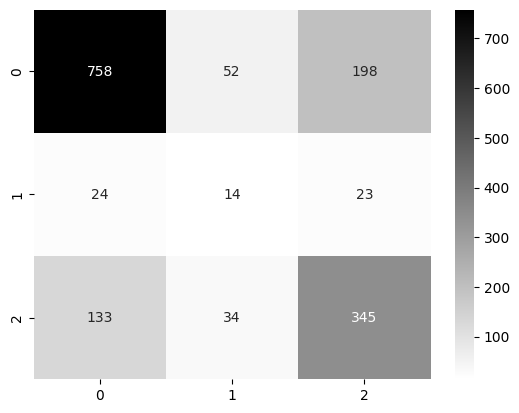

Accuracy:  0.7065148640101202
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1008
           1       0.14      0.23      0.17        61
           2       0.61      0.67      0.64       512

    accuracy                           0.71      1581
   macro avg       0.53      0.55      0.53      1581
weighted avg       0.73      0.71      0.72      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  10.578276516477139
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  simple  Balancing:  random


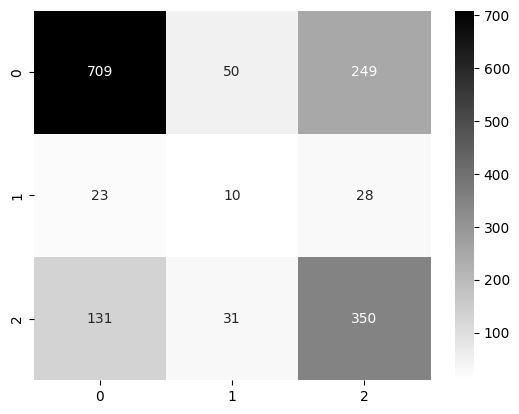

Accuracy:  0.6761543327008223
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      1008
           1       0.11      0.16      0.13        61
           2       0.56      0.68      0.61       512

    accuracy                           0.68      1581
   macro avg       0.50      0.52      0.50      1581
weighted avg       0.71      0.68      0.69      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  11.627861810759562
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  regression  Balancing:  smoteenn


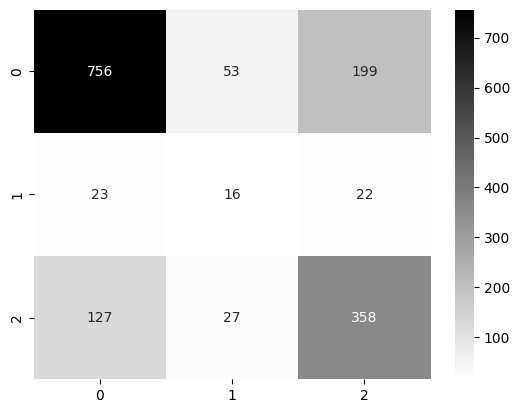

Accuracy:  0.7147375079063883
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1008
           1       0.17      0.26      0.20        61
           2       0.62      0.70      0.66       512

    accuracy                           0.71      1581
   macro avg       0.54      0.57      0.55      1581
weighted avg       0.74      0.71      0.72      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  10.28190238993791
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  regression  Balancing:  random


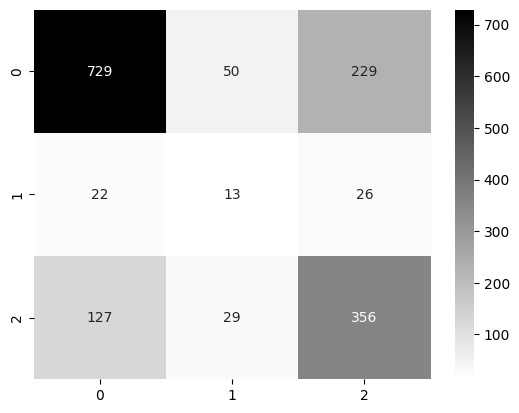

Accuracy:  0.6944971537001897
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1008
           1       0.14      0.21      0.17        61
           2       0.58      0.70      0.63       512

    accuracy                           0.69      1581
   macro avg       0.52      0.54      0.53      1581
weighted avg       0.72      0.69      0.70      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  10.944359942010065
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  knn  Balancing:  smoteenn


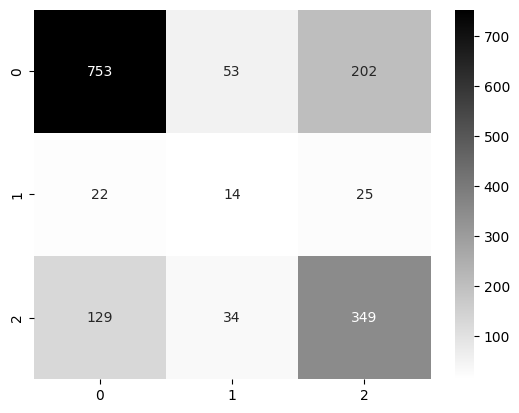

Accuracy:  0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1008
           1       0.14      0.23      0.17        61
           2       0.61      0.68      0.64       512

    accuracy                           0.71      1581
   macro avg       0.53      0.55      0.53      1581
weighted avg       0.73      0.71      0.72      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  10.601074526210928
****************************************************************************************************
Model:  DecisionTreeClassifier() Imputer:  knn  Balancing:  random


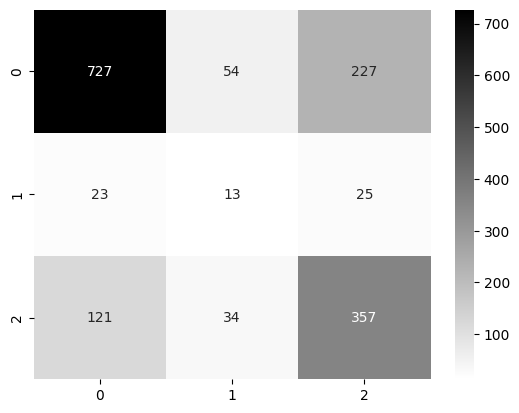

Accuracy:  0.693864642631246
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77      1008
           1       0.13      0.21      0.16        61
           2       0.59      0.70      0.64       512

    accuracy                           0.69      1581
   macro avg       0.52      0.54      0.52      1581
weighted avg       0.73      0.69      0.71      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  10.967157951743854


In [58]:
# Dry run of models to check which balance and imputer to use along with the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#the different models to try 
models = [RandomForestClassifier(),SVC(probability=True),  DecisionTreeClassifier()]
#testing out the different models 
for model in models:
    test_model(model)

## Best configuration achieved
1. SVC(probability=True) Imputer:  regression  Balancing:  smoteenn 
2. RandomForestClassifier() Imputer:  regression  Balancing:  random 

## Preparing our trating and test sets for the final model.

In [76]:
import optuna
import sklearn
import sklearn.ensemble
import sklearn.model_selection
from sklearn.metrics import log_loss

# Assuming 'x' and 'y' are your features and target variable respectively
# Modify x and y according to your dataset

# RandomForestClassifier() Imputer:  regression  Balancing:  random
imputer = "regression"
balancing = "random"
train_data = pipeline(train, imputer, balancing)
test = pipeline(val, imputer, "none")

In [77]:
# Process training data
train_y = train_data["Status"]
train_data_numeric = train_data.drop(columns=categorical+["id", "Status"])
train_data_num = scale.fit_transform(train_data_numeric)
train_data_num = pd.DataFrame(train_data_num, columns=train_data_numeric.columns, index=train_data_numeric.index)

train_data_cat = train_data.drop(columns=numerical+["id", "Status"])
train_data_cat = one_hot_encoder.fit_transform(train_data_cat)

train_data = pd.concat([train_data_cat, train_data_num], axis=1)

# Process test data
test_y = test["Status"]
test_numeric = test.drop(columns=categorical+["id", "Status"])
test_num = scale.transform(test_numeric)
test_num = pd.DataFrame(test_num, columns=test_numeric.columns, index=test_numeric.index)

test_cat = test.drop(columns=numerical+["id", "Status"])
test_cat = one_hot_encoder.transform(test_cat)

test = pd.concat([test_cat, test_num], axis=1)

train_y = train_y.astype(int) - 1
test_y = test_y.astype(int) - 1


### Tuning Two Promising models with their best configuration

Tuning Random Forest Classifier using optuna

In [61]:
# Define the objective function for Optuna
x = train_data
y = train_y

def objective(trial):
    # Parameters to optimize
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 50, 500)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 20)
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 20)
    rf_max_features = trial.suggest_categorical("rf_max_features", ['sqrt', 'log2'])
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])

    # Create Random Forest classifier with suggested parameters
    classifier_obj = sklearn.ensemble.RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        max_features=rf_max_features,
        criterion=criterion,
        bootstrap=bootstrap,
        class_weight=class_weight,
        random_state=5059
    )

    # Calculat
    log_losses = []
    kf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=5059)

    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier_obj.fit(x_train, y_train)
        y_pred = classifier_obj.predict_proba(x_test)

        # Rescale the predicted probabilities
        y_pred_rescaled = y_pred / y_pred.sum(axis=1, keepdims=True)

        # Replace extreme values with the specified bounds
        epsilon = 1e-15
        y_pred_rescaled = np.clip(y_pred_rescaled, epsilon, 1 - epsilon)

        # Compute log loss using the rescaled probabilities
        log_loss_value = log_loss(y_test, y_pred_rescaled)

        log_losses.append(log_loss_value)

    return np.mean(log_losses)

# Create an Optuna study object
study = optuna.create_study(direction="minimize")  # Specify "minimize" for log loss

# Optimize the objective function
study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-04-05 17:41:05,789] A new study created in memory with name: no-name-e40ac81c-e55d-41ca-af49-9b146a1f6a65
[I 2024-04-05 17:41:13,261] Trial 0 finished with value: 0.6813932273601175 and parameters: {'rf_n_estimators': 393, 'rf_max_depth': 6, 'rf_min_samples_split': 15, 'rf_min_samples_leaf': 13, 'rf_max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.6813932273601175.
[I 2024-04-05 17:41:26,642] Trial 1 finished with value: 0.521198450404453 and parameters: {'rf_n_estimators': 437, 'rf_max_depth': 17, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 15, 'rf_max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.521198450404453.
[I 2024-04-05 17:41:36,323] Trial 2 finished with value: 0.555406786378635 and parameters: {'rf_n_estimators': 345, 'rf_max_depth': 11, 'rf_min_samples_split': 20, 'rf_min_samples_leaf': 19, 'rf_max_feat

Best trial:
  Value:  0.33803085223960033
  Params: 
    rf_n_estimators: 424
    rf_max_depth: 20
    rf_min_samples_split: 4
    rf_min_samples_leaf: 1
    rf_max_features: sqrt
    criterion: entropy
    bootstrap: False
    class_weight: balanced_subsample


In [62]:
from sklearn.inspection import permutation_importance

def feature_importance(model,x_test,y_test):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    feature_names = x_test.columns

    forest_importances = pd.Series(importances , index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

    result = permutation_importance(
        model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )

    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()


### Evaluating our best model with the most promising configuration

{'rf_n_estimators': 424, 'rf_max_depth': 20, 'rf_min_samples_split': 4, 'rf_min_samples_leaf': 1, 'rf_max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False, 'class_weight': 'balanced_subsample'}


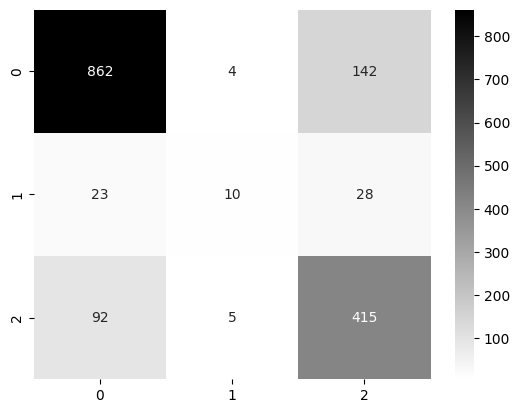

Accuracy:  0.8140417457305503
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1008
           1       0.53      0.16      0.25        61
           2       0.71      0.81      0.76       512

    accuracy                           0.81      1581
   macro avg       0.71      0.61      0.63      1581
weighted avg       0.81      0.81      0.81      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5188982421949817


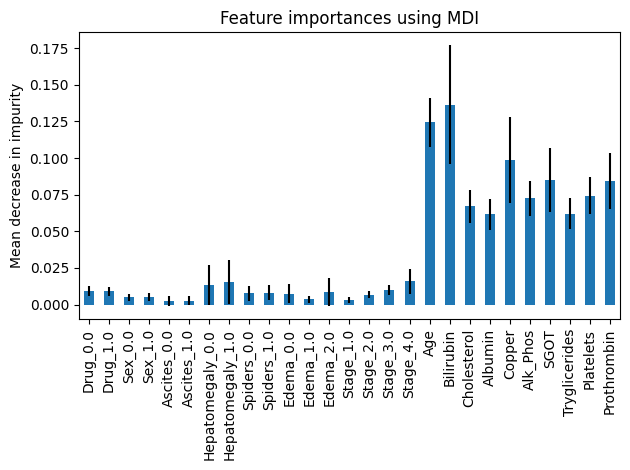

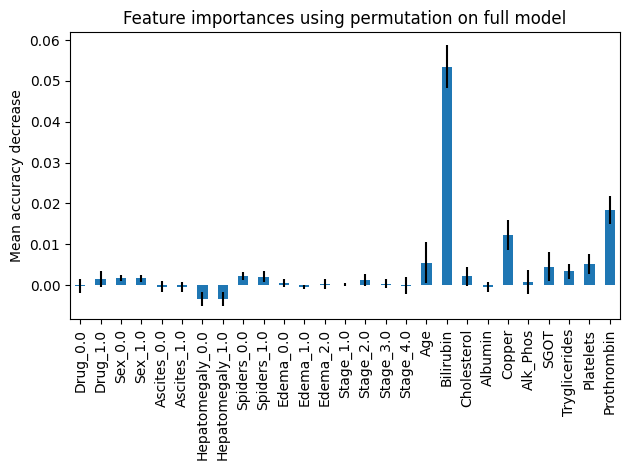

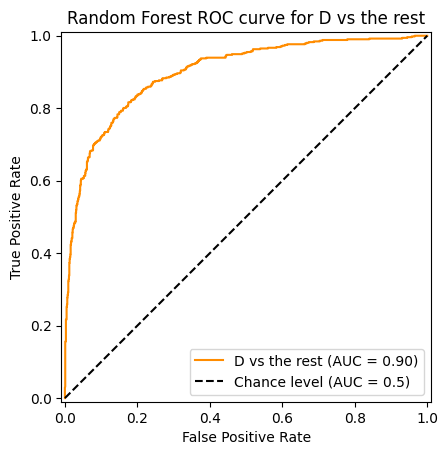

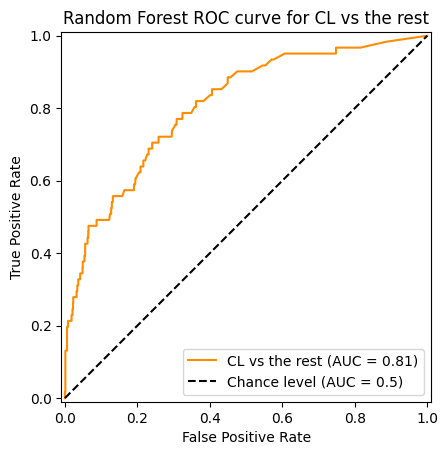

In [79]:
# Create model with best parameters
best_params = trial.params
print(best_params)


model = sklearn.ensemble.RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
    min_samples_leaf=best_params['rf_min_samples_leaf'],
    max_features=best_params['rf_max_features'],
    criterion=best_params['criterion'],
    bootstrap=best_params['bootstrap'],
    class_weight=best_params['class_weight'],
    random_state=42
)

model.fit(x, y)

# Evaluate the model
evaluate(model, test, test_y)
feature_importance(model,test,test_y)

plotROC(model,2,test,test_y,train_y,"Random Forest ROC curve for D vs the rest","D ")
plotROC(model,1,test,test_y,train_y,"Random Forest ROC curve for CL vs the rest","CL ")

#### Running the Random Forest model on our test set and getting a csv for kaggle submission.

In [64]:
# testing the model on the test data
test = pd.read_csv("/cs/studres/ID5059/Coursework/Coursework-2/data/test.csv")
# # create a dummy column for the status

test['Status'] = test['Status'] = np.random.randint(0, 3, size=len(test))
test = pipeline(test, "regression", "none")
test_ids = test["id"]

# # preprocess the test data
test_numeric = test.drop(columns=categorical+["id", "Status"])
test_num = scale.transform(test_numeric)
test_num = pd.DataFrame(test_num, columns=test_numeric.columns, index=test_numeric.index)

test_cat = test.drop(columns=numerical+["id", "Status"])
test_cat = one_hot_encoder.transform(test_cat)

test = pd.concat([test_cat, test_num], axis=1)

predictions = model.predict_proba(test)


column_names = ['Status_C', 'Status_CL', 'Status_D']

predictions_df = pd.DataFrame(predictions, columns=column_names)
predictions_df = pd.concat([test_ids, predictions_df], axis=1)
# predictions

predictions_df

# save the predictions to a csv file
predictions_df.to_csv("grp_27_predictions_rfc.csv", index=False)


In [65]:
#models to plot is the list of models to plot
#modelTypes is a list of the labels to give the respective models on the graph i.e the name of the model 
#plotRoc([Svm,LinearRegression],["SVM","Linear Regression"],test_x,Test_y)
def plotRoc(modelsToPlot, modelTypes, test_x, test_y):
    plt.figure(figsize=(8, 6))
    for x in range(len(modelsToPlot) - 1):
        fpr , tpr , thresholds = sklearn.metrics.roc_curve(test_y, modelsToPlot[x].predict_proba(test_x)[:,1])
        plt.plot(fpr, tpr, linewidth=2, label=modelTypes[x])

 
    plt.plot([0, 1], [0, 1], 'black')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=0)
    plt.xlabel('FPR (1 - specificity)', fontsize=16)
    plt.ylabel('TPR (recall)', fontsize=16)
    plt.grid(True)
    plt.show()

![ALT_TEXT_FOR_SCREEN_READERS](imgs/kaggle_submission_rfc.jpeg)

Tuning SVC using GridSearchCV

In [80]:
# RandomForestClassifier() Imputer:  regression  Balancing:  random
imputer = "regression"
balancing = "random"
train_data = pipeline(train, imputer, balancing)
test = pipeline(val, imputer, "none")

In [81]:
# Process training data
train_y = train_data["Status"]
train_data_numeric = train_data.drop(columns=categorical+["id", "Status"])
train_data_num = scale.fit_transform(train_data_numeric)
train_data_num = pd.DataFrame(train_data_num, columns=train_data_numeric.columns, index=train_data_numeric.index)

train_data_cat = train_data.drop(columns=numerical+["id", "Status"])
train_data_cat = one_hot_encoder.fit_transform(train_data_cat)

train_data = pd.concat([train_data_cat, train_data_num], axis=1)

# Process test data
test_y = test["Status"]
test_numeric = test.drop(columns=categorical+["id", "Status"])
test_num = scale.transform(test_numeric)
test_num = pd.DataFrame(test_num, columns=test_numeric.columns, index=test_numeric.index)

test_cat = test.drop(columns=numerical+["id", "Status"])
test_cat = one_hot_encoder.transform(test_cat)

test = pd.concat([test_cat, test_num], axis=1)

train_y = train_y.astype(int) - 1
test_y = test_y.astype(int) - 1

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Gamma was found to have the biggest impact 
param_grid_svm = [{
    "gamma" : [0.05, 0.1, 0.15],
}]


svm_clf = SVC(random_state=2049, probability=True)
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, verbose=3, scoring="neg_log_loss", refit=True) #scoring="neg_log_loss", refit="neg_log_loss"

svm_grid_search.fit(train_data, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................gamma=0.05;, score=-0.674 total time=   3.7s
[CV 2/5] END .......................gamma=0.05;, score=-0.664 total time=   3.7s
[CV 3/5] END .......................gamma=0.05;, score=-0.683 total time=   3.7s
[CV 4/5] END .......................gamma=0.05;, score=-0.671 total time=   3.7s
[CV 5/5] END .......................gamma=0.05;, score=-0.653 total time=   3.7s
[CV 1/5] END ........................gamma=0.1;, score=-0.586 total time=   3.7s
[CV 2/5] END ........................gamma=0.1;, score=-0.579 total time=   3.8s
[CV 3/5] END ........................gamma=0.1;, score=-0.607 total time=   3.8s
[CV 4/5] END ........................gamma=0.1;, score=-0.598 total time=   3.8s
[CV 5/5] END ........................gamma=0.1;, score=-0.572 total time=   3.8s
[CV 1/5] END .......................gamma=0.15;, score=-0.521 total time=   3.9s
[CV 2/5] END .......................gamma=0.15;, 

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=2049),
             param_grid=[{'gamma': [0.05, 0.1, 0.15]}], scoring='neg_log_loss',
             verbose=3)

SVC(gamma=0.15, probability=True, random_state=2049)


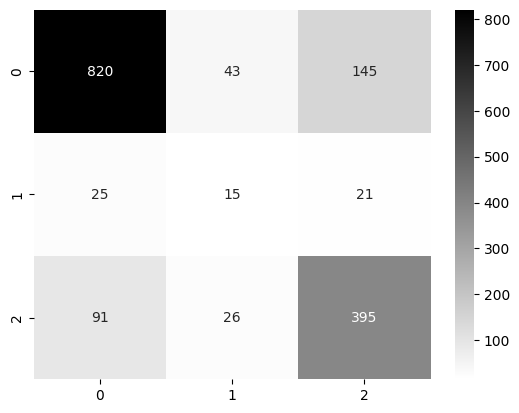

Accuracy:  0.777988614800759
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1008
           1       0.18      0.25      0.21        61
           2       0.70      0.77      0.74       512

    accuracy                           0.78      1581
   macro avg       0.59      0.61      0.60      1581
weighted avg       0.79      0.78      0.78      1581

Unique Classes:  [0 1 2]
Unique Predicted Classes:  [0 1 2]
Log Loss:  0.5914507411672887
-0.5175856335664218


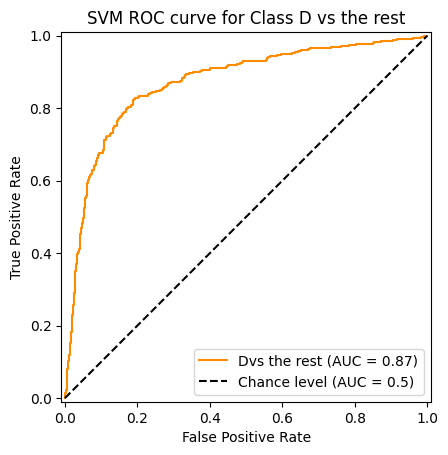

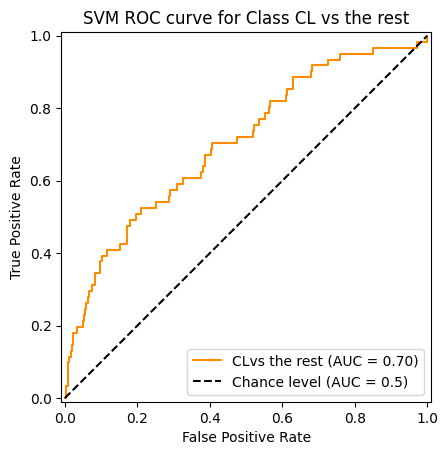

In [83]:
#Get the best Svm
svm_best = svm_grid_search.best_estimator_
print(svm_grid_search.best_estimator_)
#evaluate it against the test and train datasets 
evaluate(svm_best, test, test_y)
print(svm_grid_search.best_score_)

plotROC(svm_best,2,test,test_y,train_y,"SVM ROC curve for Class D vs the rest","D")
plotROC(svm_best,1,test,test_y,train_y,"SVM ROC curve for Class CL vs the rest","CL")


### Running the SVM model on our test set and prepare for submission.

In [84]:
# testing the model on the test data
test = pd.read_csv("/cs/studres/ID5059/Coursework/Coursework-2/data/test.csv")
# # create a dummy column for the status

test['Status'] = 0
test = pipeline(test, "regression", "none")
test_ids = test["id"]

# # preprocess the test data
test_numeric = test.drop(columns=categorical+["id", "Status"])
test_num = scale.transform(test_numeric)
test_num = pd.DataFrame(test_num, columns=test_numeric.columns, index=test_numeric.index)

test_cat = test.drop(columns=numerical+["id", "Status"])
test_cat = one_hot_encoder.transform(test_cat)

test = pd.concat([test_cat, test_num], axis=1)

predictions = svm_best.predict_proba(test)


column_names = ['Status_C', 'Status_CL', 'Status_D']

predictions_df = pd.DataFrame(predictions, columns=column_names)
predictions_df = pd.concat([test_ids, predictions_df], axis=1)
# predictions

predictions_df

# save the predictions to a csv file
predictions_df.to_csv("grp_27_predictions_svm.csv", index=False)


![ALT_TEXT_FOR_SCREEN_READERS](imgs/kaggle_submission_svm.jpeg)